In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.cluster import KMeans

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.chdir("D:\Fax\ECMI\ECMI_Data\data_1bit\AlpArray")

Read the data from hdf5-files

In [ ]:
#all_stations = []

In [ ]:
'''    filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2016" + str(183) + '_local_pair_dist.txt'
    filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2016" + str(183) + ".h5"

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[2]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    count = 0
    for pair in pairs_of_statation:
        for line in splited_lines:    
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                count += 1
                if pair[0] + " " + pair[1] not in distances.keys():
                    distances.update({pair[0] + " " + pair[1]: line[2]})
                extracted_data.append([data[int(line[5])], pair])
    number_of_connections_per_day.append(count) 
'''

In [3]:
name_of_stations = ['FR.CALF.00.HHZ', 'FR.ENAUX.00.HHZ','FR.EILF.00.HHZ', 'FR.ESCA.01.HHZ', 'FR.ISO.00.HHZ','FR.MON.00.HHZ',
                    'FR.MLYF.00.HHZ', 'FR.MVIF.00.HHZ' ,'FR.PRIMA.00.HHZ', 'FR.SAOF.00.HHZ', 'FR.SPIF.00.HHZ','FR.TRIGF.00.HHZ',
                    'FR.TURF.00.HHZ', 'Z3.A205A.00.HHZ', 'Z3.A206A.00.HHZ']
pairs_of_statation = []
for i in range(len(name_of_stations)):
    for j in range(i+1, len(name_of_stations)):
        pairs_of_statation.append([name_of_stations[i], name_of_stations[j]])

In [4]:
extracted_data = []
number_of_connections_per_day = []
distances = {}
for day in range(183, 366):
    filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2016" + str(day) + '_local_pair_dist.txt'
    filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2016" + str(day) + ".h5"

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[2]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    count = 0
    for pair in pairs_of_statation:
        for line in splited_lines:    
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                count += 1
                if pair[0] + " " + pair[1] not in distances.keys():
                    distances.update({pair[0] + " " + pair[1]: line[2]})
                extracted_data.append([data[int(line[5])], pair])
    number_of_connections_per_day.append(count) 
        
for day in range(1, 182):
    if day < 10:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "201700" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"201700" + str(day) + ".h5"
    elif day < 100:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "20170" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"20170" + str(day) + ".h5"
    else:
        filename_info = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/METRICS/' + "2017" + str(day) + '_local_pair_dist.txt'
        filename = 'D:/Fax/ECMI/ECMI_Data/dt/AlpArray/' +"2017" + str(day) + ".h5"        

    f = h5py.File(filename, 'r')
    a_group_key = list(f.keys())[2]
    data = list(f[a_group_key])
    file = open(filename_info, mode='r')
    
    lines = []
    for i, line in enumerate(file):
        lines.append(line + " " + str(i))
    splited_lines = []
    for line in lines:
        splited_lines.append(line.split(" "))
    places = []
    count = 0
    for pair in pairs_of_statation:
        for line in splited_lines:
            if (pair[0] in line) and (pair[1] in line):
                places.append(line[5])
                count += 1
                if pair[0] + " " + pair[1] not in distances.keys():
                    distances.update({pair[0] + " " + pair[1]: line[2]})
                extracted_data.append([data[int(line[5])], pair])
    number_of_connections_per_day.append(count)

In [5]:
sort_distances = [(v, k) for k, v in distances.items()] 
sort_distances = sorted(sort_distances, reverse=False)
sort_distances = [(k, v) for v, k in sort_distances]

In [6]:
pairs_and_values = {}
for pairs in pairs_of_statation:
    for data in extracted_data:
        if pairs == data[1]:
            if pairs[0] + " " + pairs[1] not in pairs_and_values:
                pairs_and_values.update({pairs[0] + " " + pairs[1]: data[1]})
            pairs_and_values[pairs[0] + " " + pairs[1]].append(data[0])

In [7]:
sorted_values = {}
avg_delay_per_day = 0
for key in pairs_and_values.keys():
    holder = pairs_and_values[key][2:]
    values = []
    for value in holder:
        values.extend(value[0])
        avg_delay_per_day += np.mean(np.array(value[0]))
    sorted_values.update({key:values})
    avg_delay_per_day /= len(holder)
avg_delay_per_day

-0.014620266480436739

In [8]:
max_number_of_connection = 0
for value in sorted_values.values():
    if len(value) > max_number_of_connection:
        max_number_of_connection = len(value)
connections = {}
for key, value in sorted_values.items():
        if key not in connections:
            connections.update({key: len(value)/max_number_of_connection})

In [9]:
sort_connections = [(v, k) for k, v in connections.items()] 
#sort_connections = sorted(sort_connections, reverse=True)
sort_connections = [(k, v) for v, k in sort_connections]

In [10]:
import collections
od = collections.OrderedDict(sorted(distances.items()))

In [11]:
connecc = []
diss = []
for i in sort_connections:
    connecc.append(i[1])
for i in od.values():
    diss.append(float(i))
diss = np.array(diss)
diss /= np.max(diss)

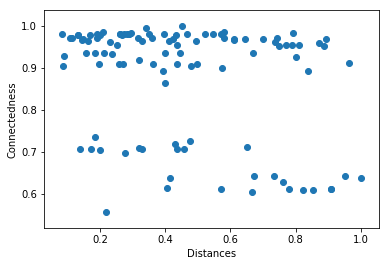

In [12]:
fig = plt.figure()
plt.scatter(diss, connecc)
plt.xlabel("Distances")
plt.ylabel("Connectedness")
plt.axis
plt.show()

7848


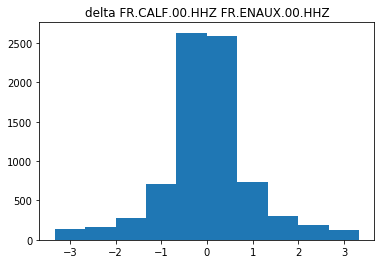

8472


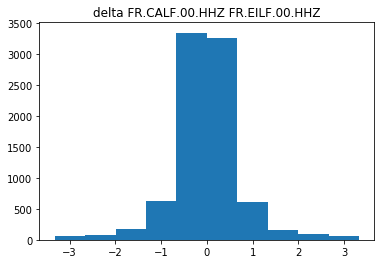

8472


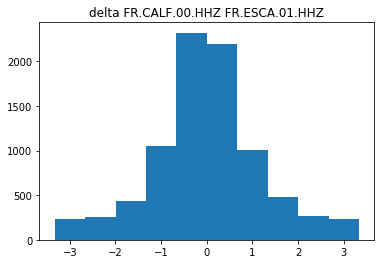

8592


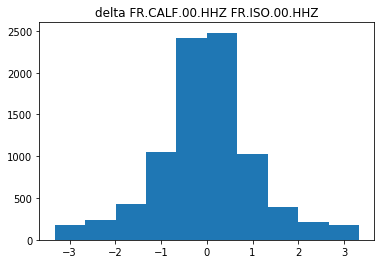

5544


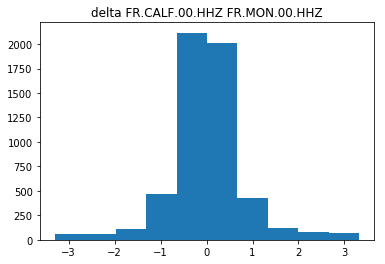

8472


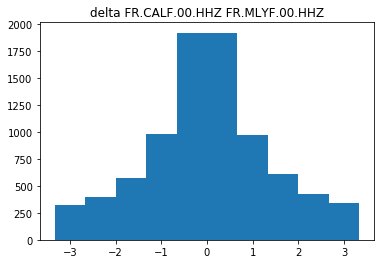

8448


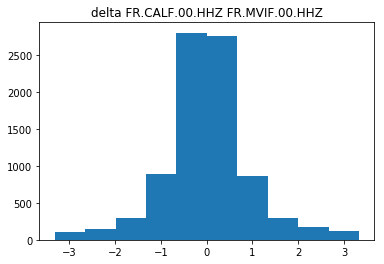

6360


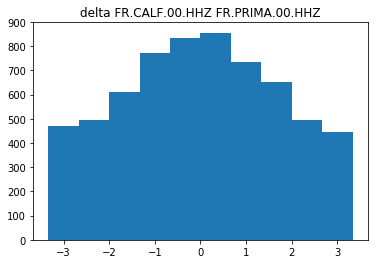

8088


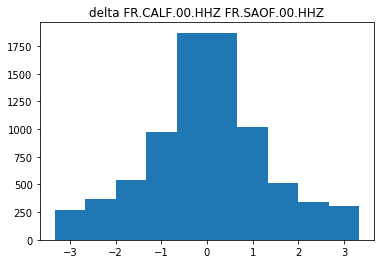

8496


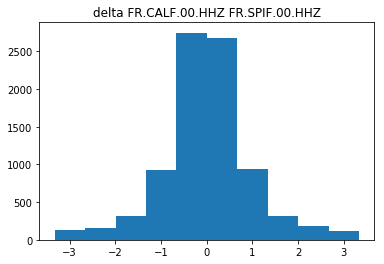

8472


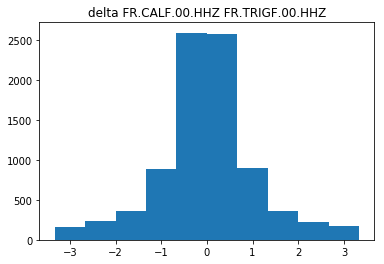

8400


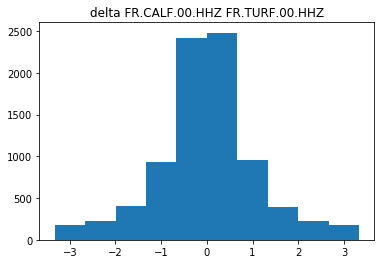

8520


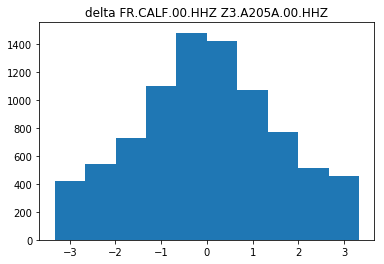

8640


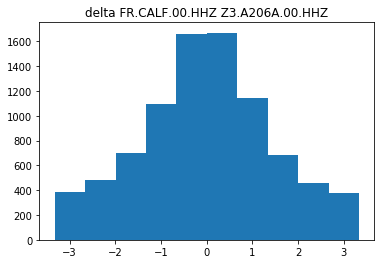

7848


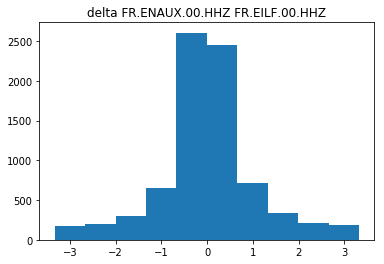

7848


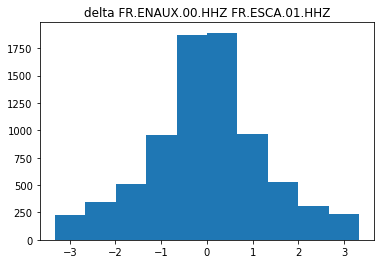

7704


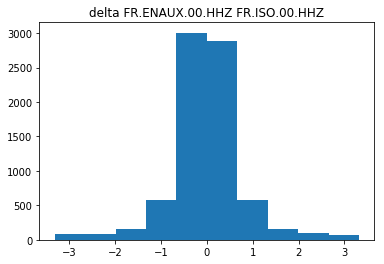

4800


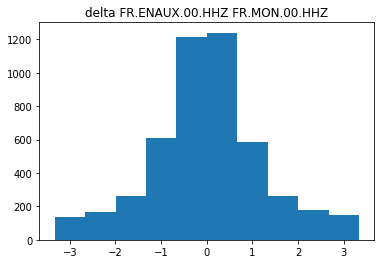

7848


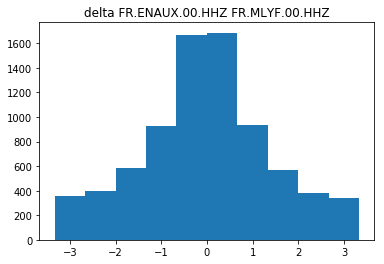

7824


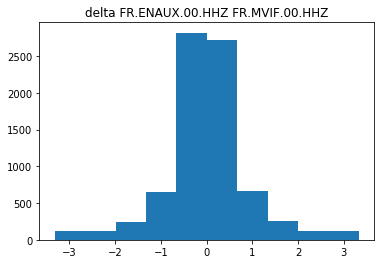

5496


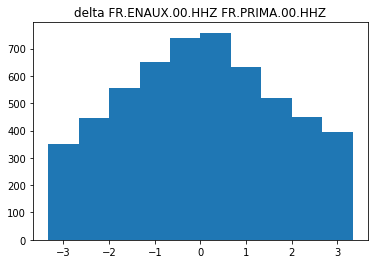

7464


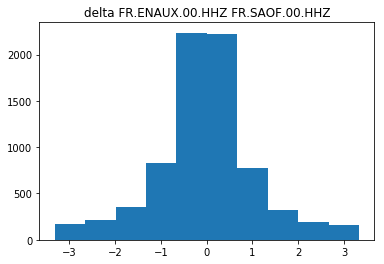

7848


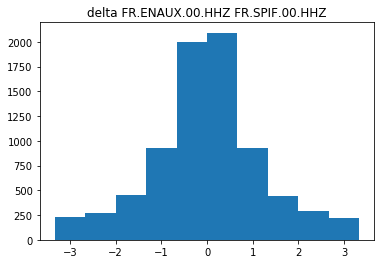

7848


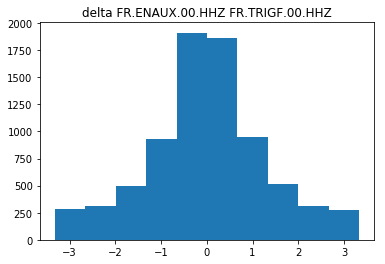

7776


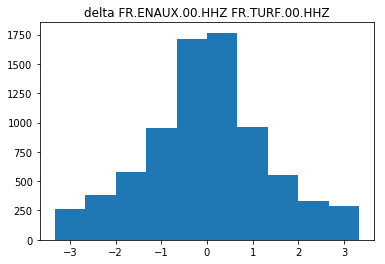

7704


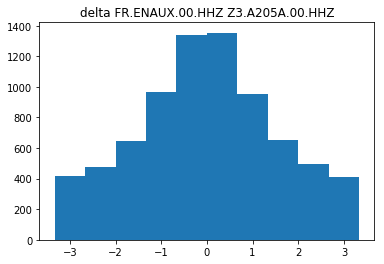

7824


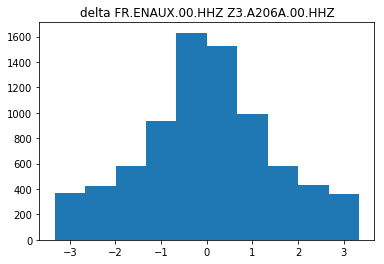

8472


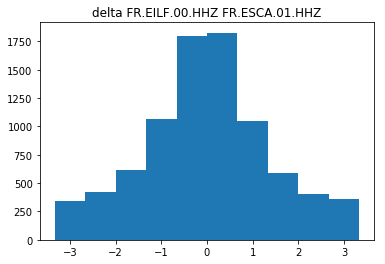

8328


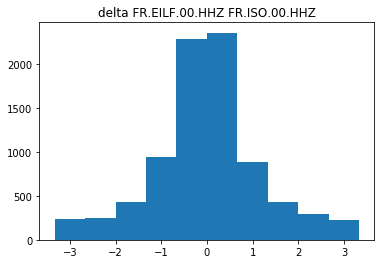

5280


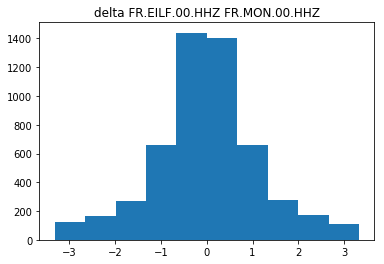

8472


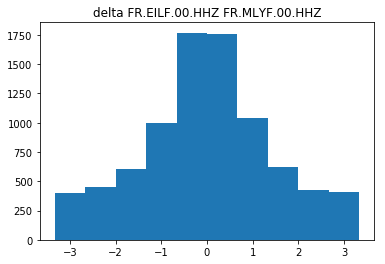

8448


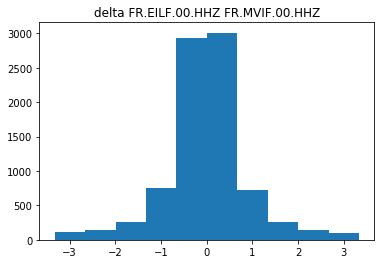

6096


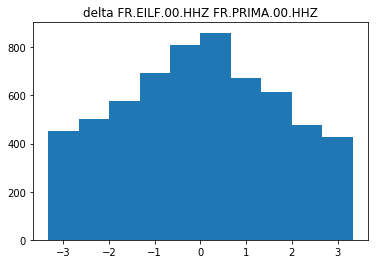

8088


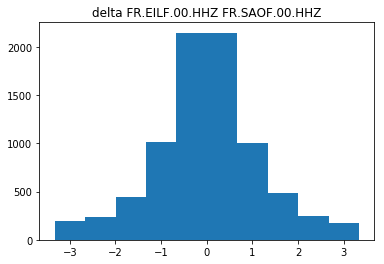

8472


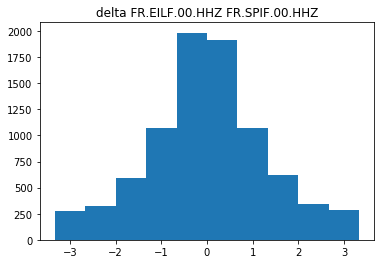

8472


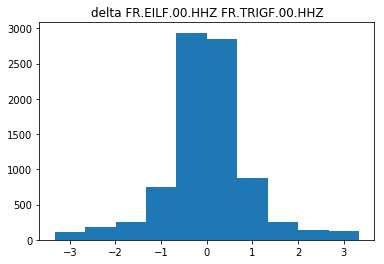

8400


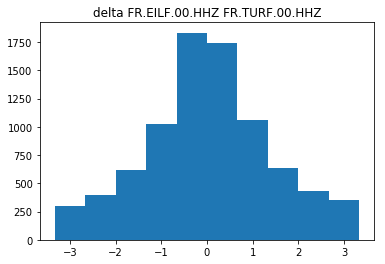

8256


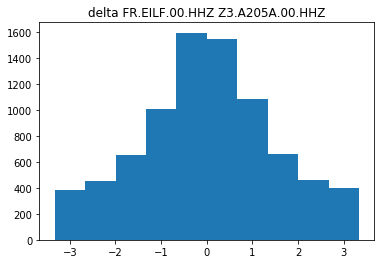

8376


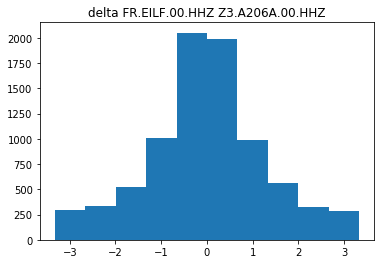

8328


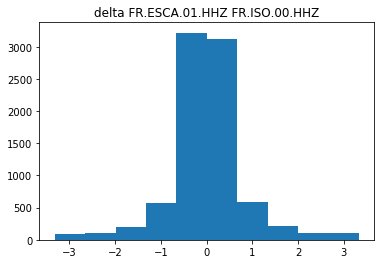

5280


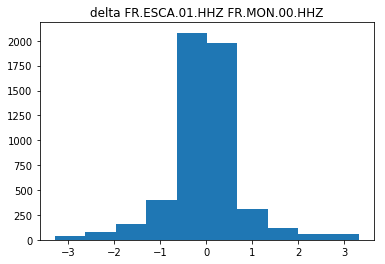

8472


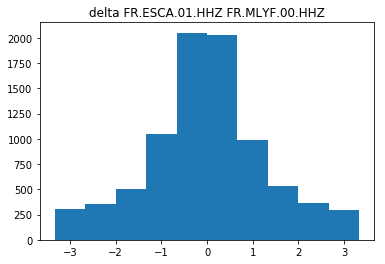

8448


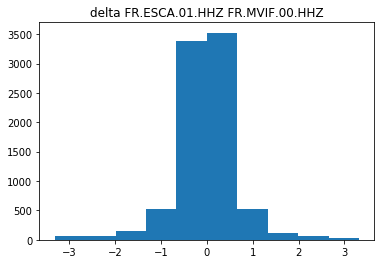

6096


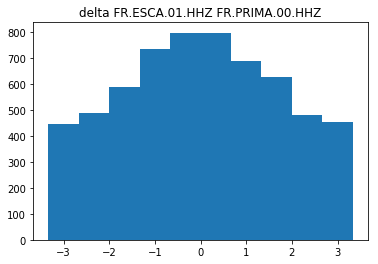

8088


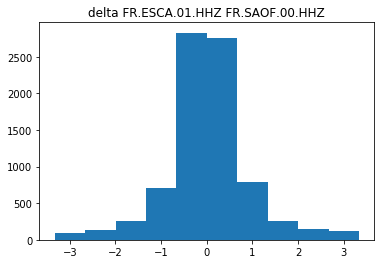

8472


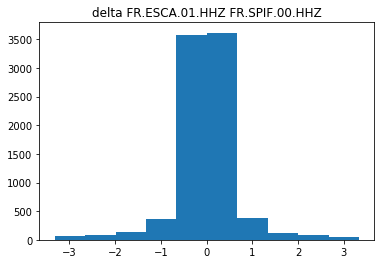

8472


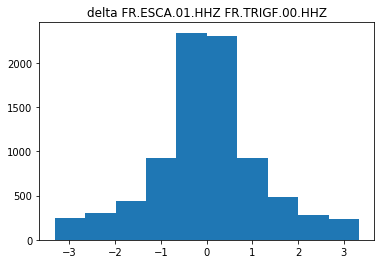

8400


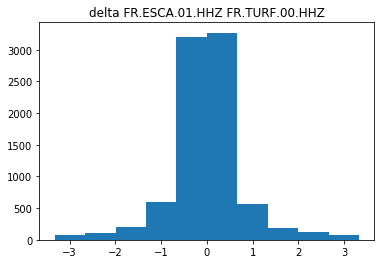

8256


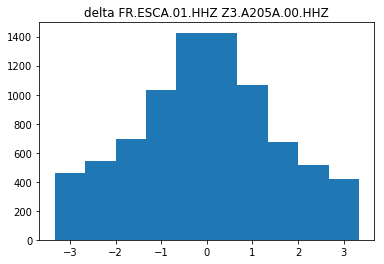

8376


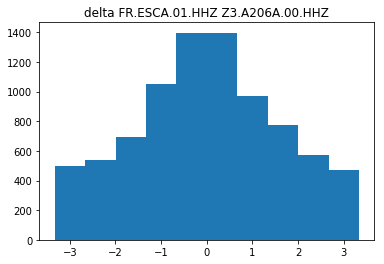

5544


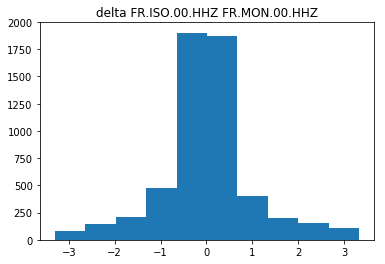

8328


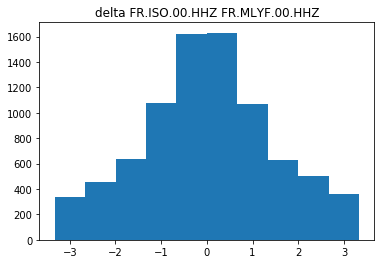

8304


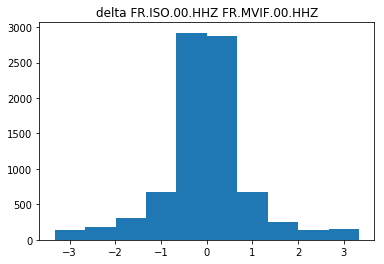

6216


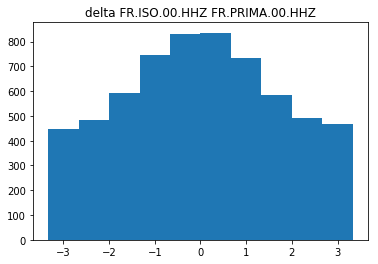

7944


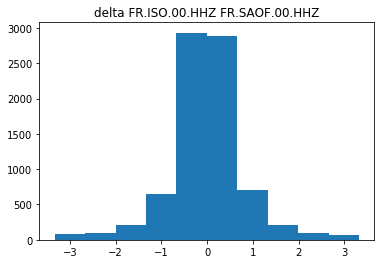

8352


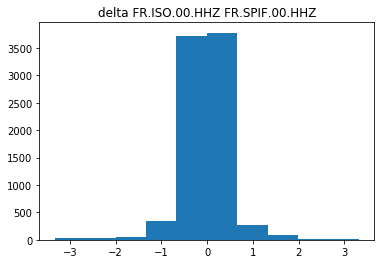

8328


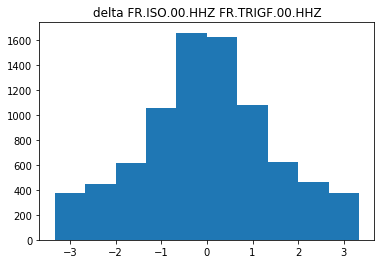

8256


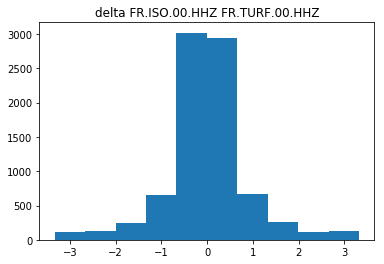

8376


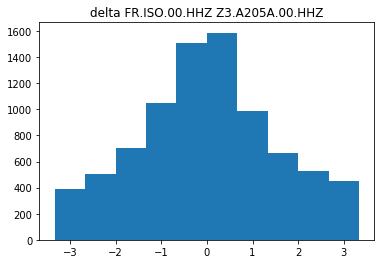

8496


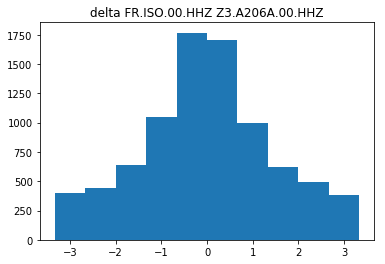

5280


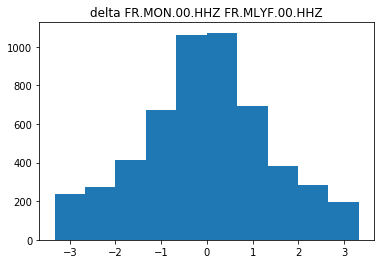

5256


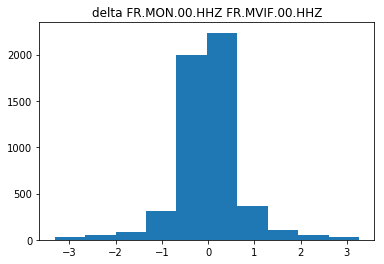

5496


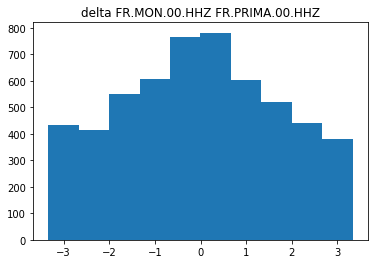

5256


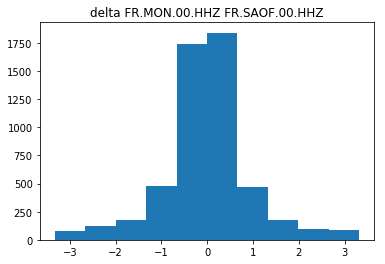

5304


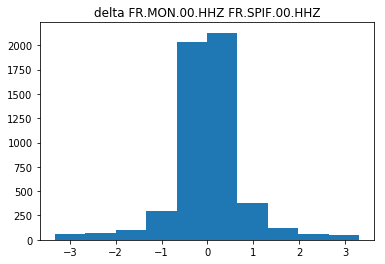

5280


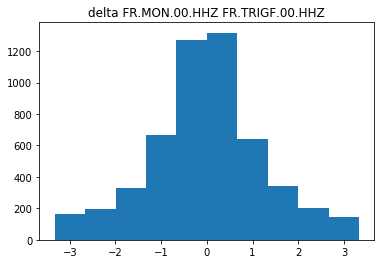

5208


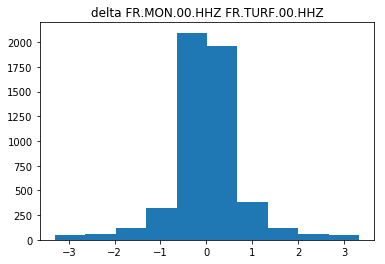

5424


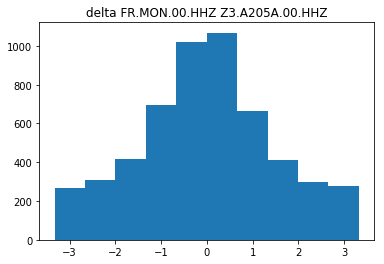

5544


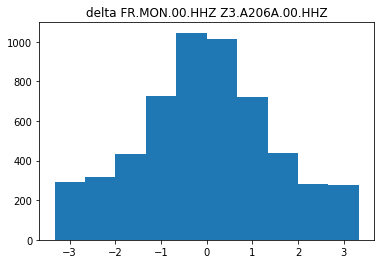

8448


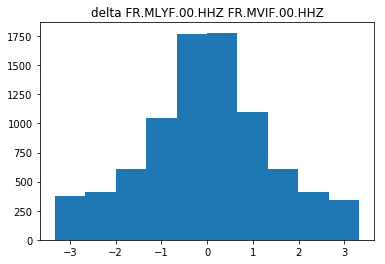

6096


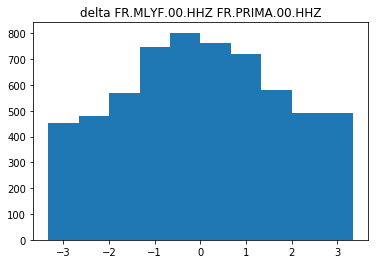

8088


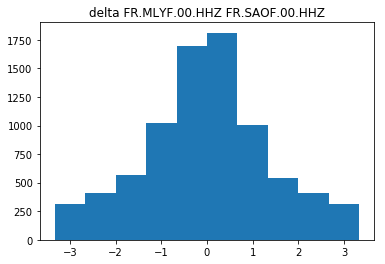

8472


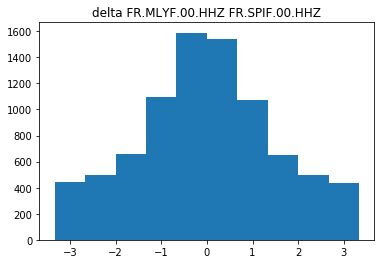

8472


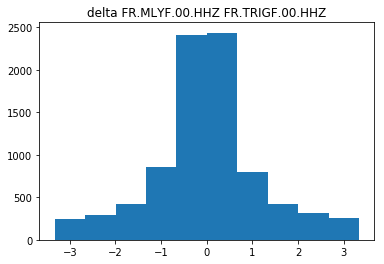

8400


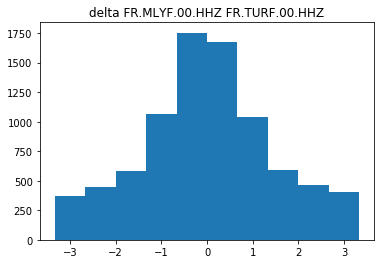

8256


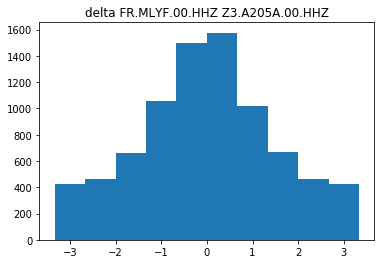

8376


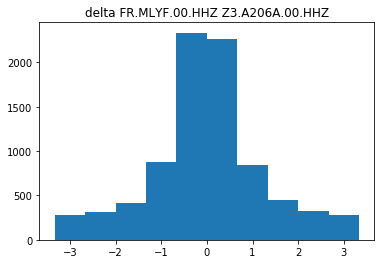

6072


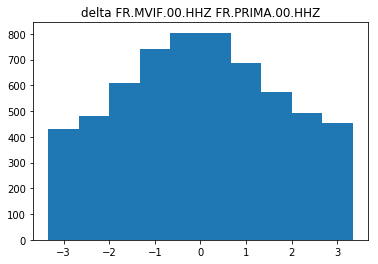

8064


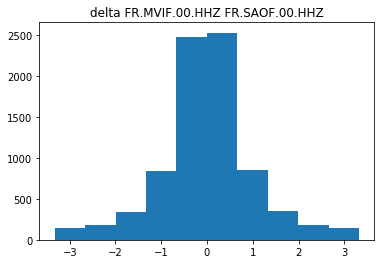

8448


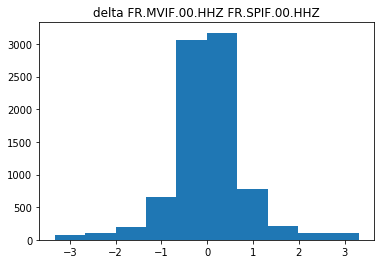

8448


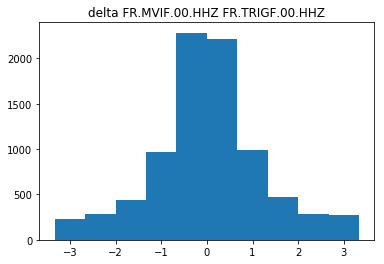

8376


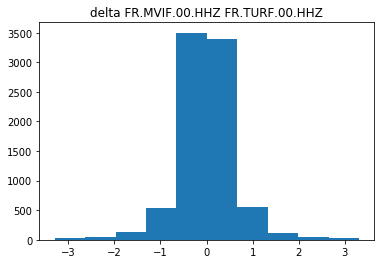

8232


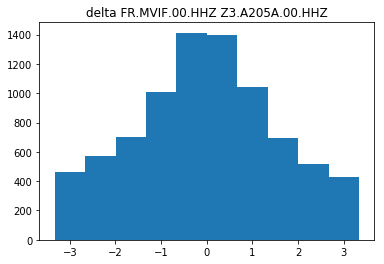

8352


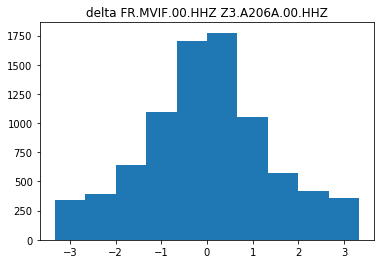

6096


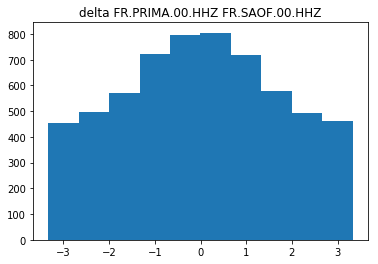

6120


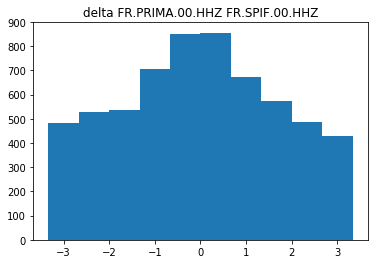

6096


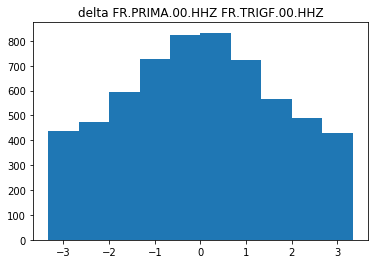

6024


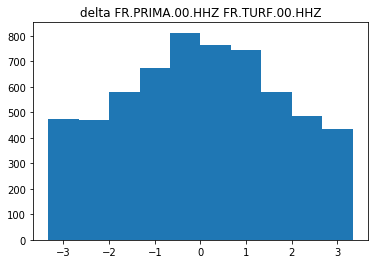

6144


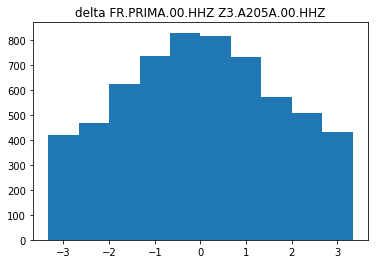

6264


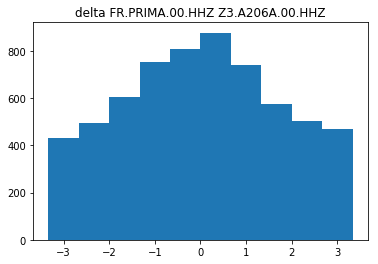

8088


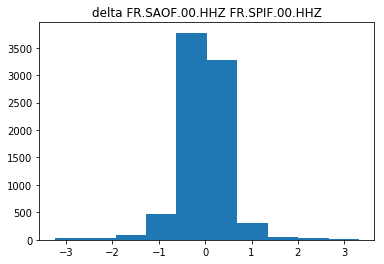

8088


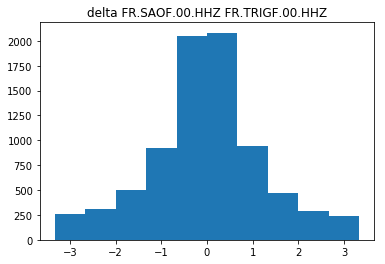

8016


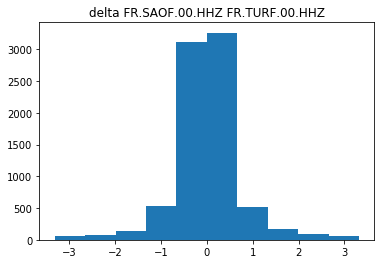

7872


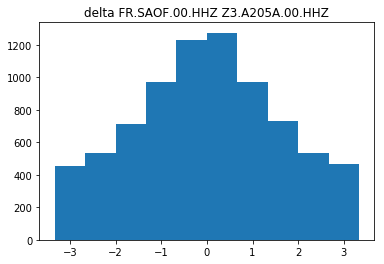

7992


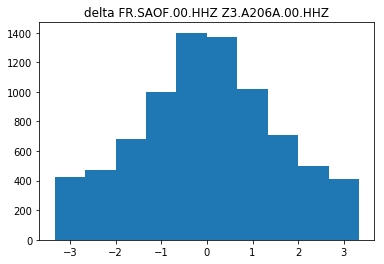

8472


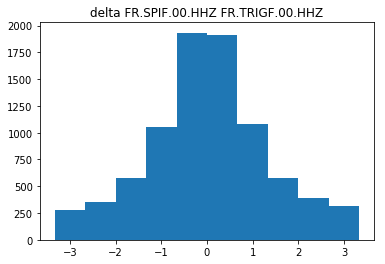

8400


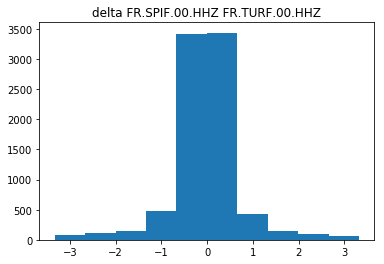

8280


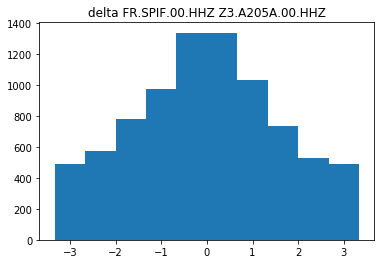

8400


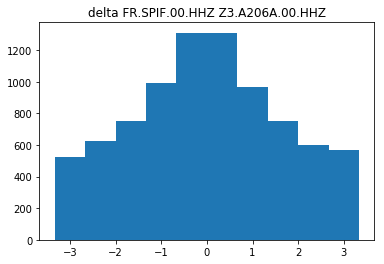

8400


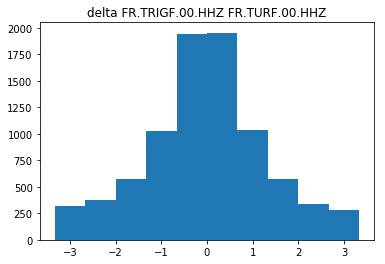

8256


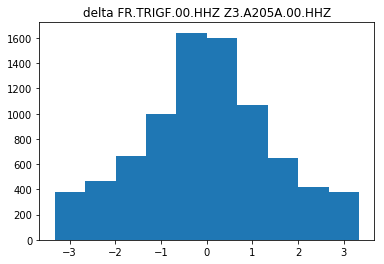

8376


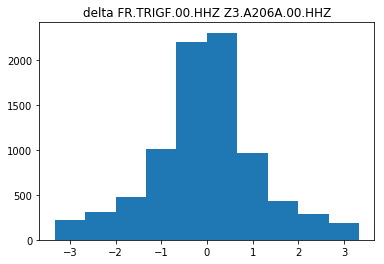

8232


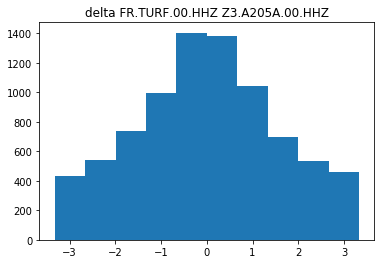

8304


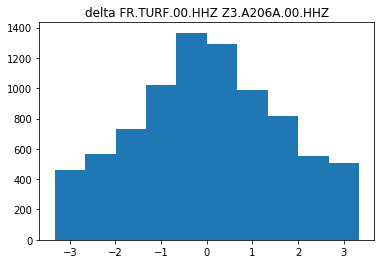

8520


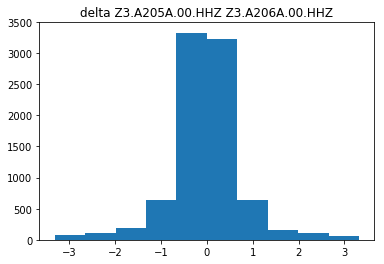

In [13]:
for keys, values in sorted_values.items():
    plt.hist(values)
    print(len(values))
    plt.title("delta %s" %(keys)) 
    plt.show()

In [14]:
avg_connectednes_of_each_stations = {}
for name in name_of_stations:
    for key, value in connections.items():
        if name in key.split(" "):
            if name not in avg_connectednes_of_each_stations.keys():
                avg_connectednes_of_each_stations.update({name: value})
            else:
                avg_connectednes_of_each_stations[name] += value
for key, value in avg_connectednes_of_each_stations.items():
    avg_connectednes_of_each_stations[key] /= len(list(avg_connectednes_of_each_stations.values()))

In [15]:
avg_delay_for_each_station = {}
#avg_between_stations_per_year = []
for station in name_of_stations:
    avg_between_stations_per_day = []
    for key, value in pairs_and_values.items():
        if station in value[0] or station in value[1]:
            if station not in avg_delay_for_each_station.keys():
                for day in value[3:]:
                    avg_between_stations_per_day.append(np.mean(day))
    #avg_between_stations_per_year.append(np.mean(avg_between_stations_per_day[:-1]))
    avg_between_stations_per_year = (np.mean(avg_between_stations_per_day[:-1]))

    if station not in avg_delay_for_each_station.keys():
        avg_delay_for_each_station.update({station: avg_between_stations_per_year})
              #  avg_delay_for_each_station[key].update({key: np.mean(value[3])})

In [16]:
avg_distance_of_each_stations = {} 
for name in name_of_stations:
    for key, value in distances.items():
        if name in key.split(" "):
            if name not in avg_distance_of_each_stations.keys():
                avg_distance_of_each_stations.update({name: float(value)})
            else:
                avg_distance_of_each_stations[name] += float(value)
maxi = max(list(avg_distance_of_each_stations.values()))
for key, value in avg_distance_of_each_stations.items():
    avg_distance_of_each_stations[key] /= maxi

In [17]:
avg_delay_for_each_station

{'FR.CALF.00.HHZ': 0.0025816523,
 'FR.ENAUX.00.HHZ': 0.00032769179,
 'FR.EILF.00.HHZ': 0.005285372,
 'FR.ESCA.01.HHZ': -0.000770126,
 'FR.ISO.00.HHZ': 0.002882459,
 'FR.MON.00.HHZ': -0.004958461,
 'FR.MLYF.00.HHZ': 0.0015808952,
 'FR.MVIF.00.HHZ': 0.00125463,
 'FR.PRIMA.00.HHZ': -0.0012128307,
 'FR.SAOF.00.HHZ': -0.00024356329,
 'FR.SPIF.00.HHZ': -0.0025681104,
 'FR.TRIGF.00.HHZ': 0.0006999881,
 'FR.TURF.00.HHZ': 0.0026503464,
 'Z3.A205A.00.HHZ': -0.0012392582,
 'Z3.A206A.00.HHZ': -0.0009362887}

In [18]:
avg_connectednes_of_each_stations

{'FR.CALF.00.HHZ': 0.8705555555555554,
 'FR.ENAUX.00.HHZ': 0.8000000000000002,
 'FR.EILF.00.HHZ': 0.8601851851851853,
 'FR.ESCA.01.HHZ': 0.8601851851851853,
 'FR.ISO.00.HHZ': 0.8572222222222222,
 'FR.MON.00.HHZ': 0.5748148148148149,
 'FR.MLYF.00.HHZ': 0.8601851851851854,
 'FR.MVIF.00.HHZ': 0.8577777777777779,
 'FR.PRIMA.00.HHZ': 0.6533333333333332,
 'FR.SAOF.00.HHZ': 0.8274074074074076,
 'FR.SPIF.00.HHZ': 0.8612962962962963,
 'FR.TRIGF.00.HHZ': 0.8601851851851853,
 'FR.TURF.00.HHZ': 0.8533333333333332,
 'Z3.A205A.00.HHZ': 0.8512962962962962,
 'Z3.A206A.00.HHZ': 0.8629629629629628}

In [19]:
avg_distance_of_each_stations

{'FR.CALF.00.HHZ': 0.4348600170962874,
 'FR.ENAUX.00.HHZ': 0.547756173552554,
 'FR.EILF.00.HHZ': 0.4995680966199572,
 'FR.ESCA.01.HHZ': 0.46063812018006084,
 'FR.ISO.00.HHZ': 0.5546475877196035,
 'FR.MON.00.HHZ': 0.49676478581249317,
 'FR.MLYF.00.HHZ': 1.0,
 'FR.MVIF.00.HHZ': 0.41970757831063465,
 'FR.PRIMA.00.HHZ': 0.4608644394018596,
 'FR.SAOF.00.HHZ': 0.5727452318995873,
 'FR.SPIF.00.HHZ': 0.4850648649117357,
 'FR.TRIGF.00.HHZ': 0.608865959366583,
 'FR.TURF.00.HHZ': 0.4904538898086674,
 'Z3.A205A.00.HHZ': 0.9062247921551813,
 'Z3.A206A.00.HHZ': 0.7685214544722012}

In [20]:
avg_dist_connec_delay = []
for i in range(len(avg_distance_of_each_stations)):
    avg_dist_connec_delay.append([list(avg_distance_of_each_stations.values())[i], 
                                  list(avg_delay_for_each_station.values())[i], 
                                  list(avg_connectednes_of_each_stations.values())[i]])

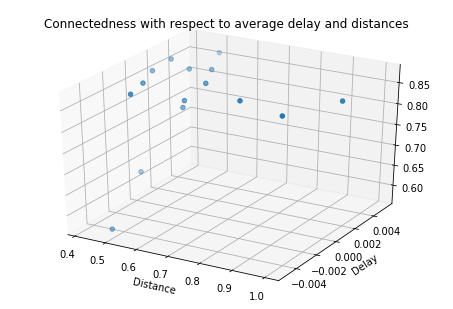

In [21]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Distance")
plt.ylabel("Delay")
plt.title("Connectedness with respect to average delay and distances")
ax.scatter(list(avg_distance_of_each_stations.values()), 
           list(avg_delay_for_each_station.values()),
           list(avg_connectednes_of_each_stations.values()))
#ax.view_init(-90, 20)
pyplot.show()

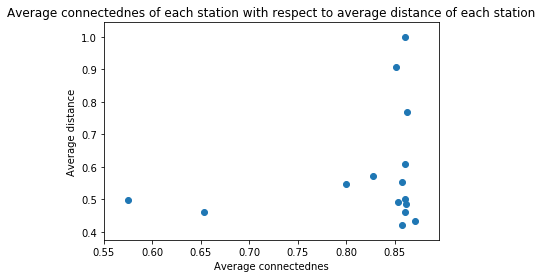

In [22]:
plt.scatter(list(avg_connectednes_of_each_stations.values()), list(avg_distance_of_each_stations.values()))
plt.title("Average connectednes of each station with respect to average distance of each station")
plt.xlabel("Average connectednes")
plt.ylabel("Average distance")
plt.show()

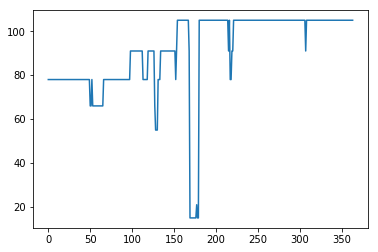

In [23]:
plt.plot(number_of_connections_per_day)
plt.show()

In [24]:
delay_avg = []
for value in sorted_values.values():
    delay_avg.append(np.mean(value))

In [25]:
delay_median = []
for value in sorted_values.values():
    delay_median.append(np.median(value))

In [26]:
diss_delay_median_connect = []
for i in range(len(diss)):
    diss_delay_median_connect.append([diss[i], delay_median[i], connecc[i]])

In [27]:
diss_delay_connect = []
for i in range(len(diss)):
    diss_delay_connect.append([diss[i], delay_avg[i], connecc[i]])

In [28]:
connet_delay_diss = []
for i in range(len(diss)):
    connet_delay_diss.append([connecc[i], delay_avg[i], diss[i]])

In [29]:
connet_diss_delay = []
for i in range(len(diss)):
    connet_diss_delay.append([connecc[i], diss[i], delay_avg[i]])

In [31]:
kmeans1 = KMeans(n_clusters=5, random_state=0, tol=0.0000001).fit(diss_delay_connect)
kmeans2 = KMeans(n_clusters=5, random_state=0, tol=0.0000001).fit(connet_delay_diss)
kmeans3 = KMeans(n_clusters=5, random_state=0, tol=0.0000001).fit(connet_diss_delay)

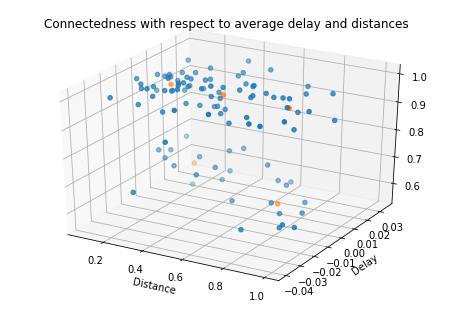

In [32]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Distance")
plt.ylabel("Delay")
plt.title("Connectedness with respect to average delay and distances")
ax.scatter(diss, delay_avg, connecc)
ax.scatter(kmeans1.cluster_centers_.T[0], kmeans1.cluster_centers_.T[1], kmeans1.cluster_centers_.T[2])
#ax.view_init(-90, 20)
pyplot.show()

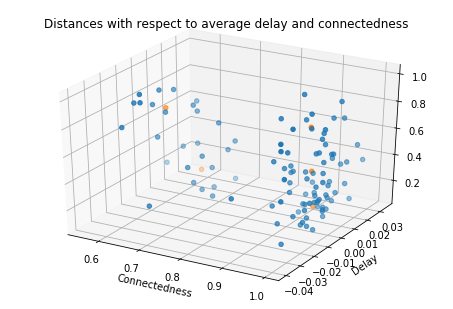

In [33]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Connectedness")
plt.ylabel("Delay")
plt.title("Distances with respect to average delay and connectedness")
ax.scatter(connecc, delay_avg, diss)
ax.scatter(kmeans2.cluster_centers_.T[0], kmeans2.cluster_centers_.T[1], kmeans2.cluster_centers_.T[2])
pyplot.show()

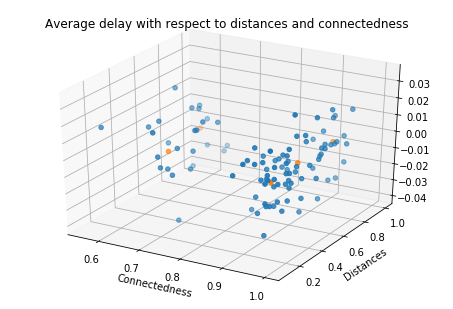

In [34]:
fig = pyplot.figure()
ax = Axes3D(fig)
plt.xlabel("Connectedness")
plt.ylabel("Distances")
plt.title("Average delay with respect to distances and connectedness")
ax.scatter(connecc, diss, delay_avg)
ax.scatter(kmeans3.cluster_centers_.T[0], kmeans3.cluster_centers_.T[1], kmeans3.cluster_centers_.T[2])
pyplot.show()

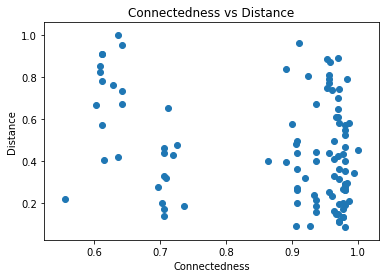

In [35]:
plt.scatter(connecc, diss)
plt.title("Connectedness vs Distance")
plt.xlabel("Connectedness")
plt.ylabel("Distance")
pyplot.show()

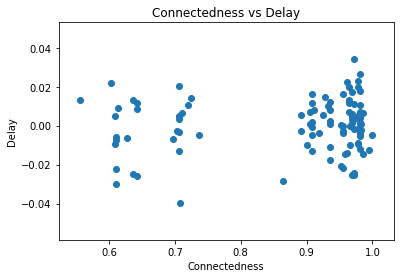

In [36]:
plt.scatter(connecc, delay_avg)
plt.title("Connectedness vs Delay")
plt.xlabel("Connectedness")
plt.ylabel("Delay")
plt.show()

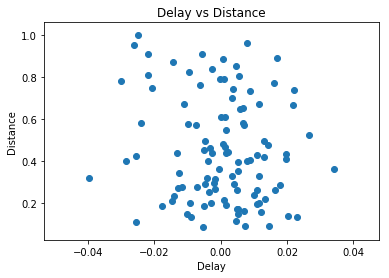

In [37]:
plt.scatter(delay_avg, diss)
plt.title("Delay vs Distance")
plt.xlabel("Delay")
plt.ylabel("Distance")
plt.show()

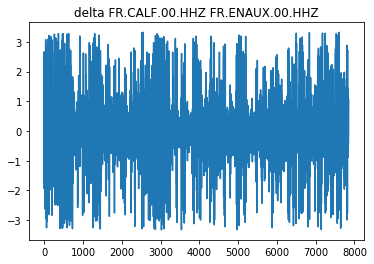

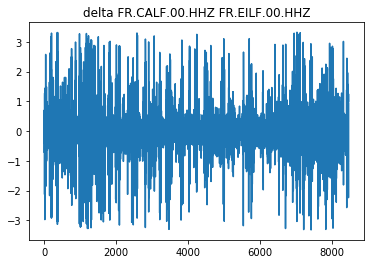

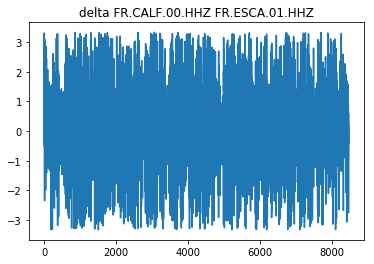

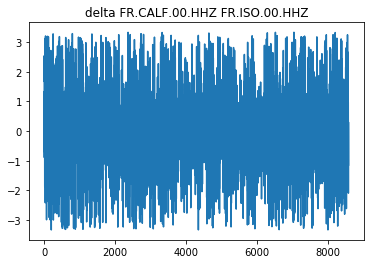

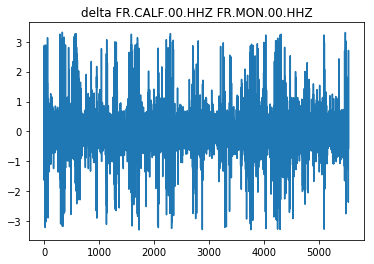

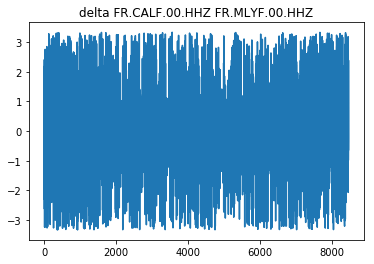

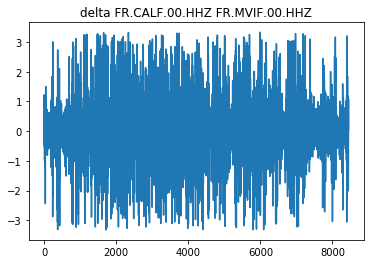

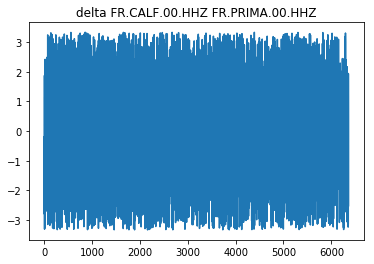

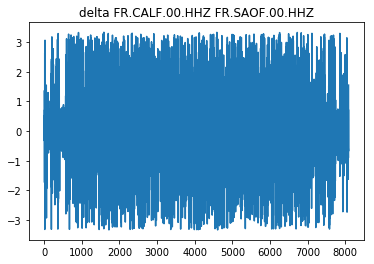

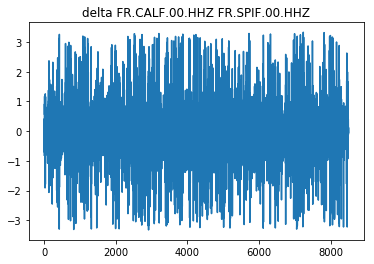

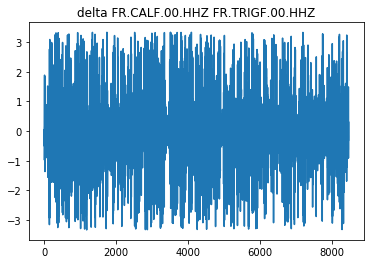

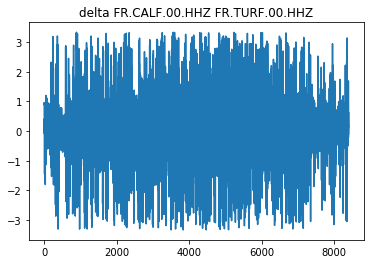

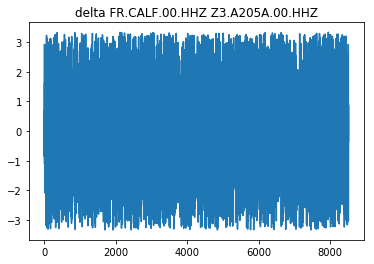

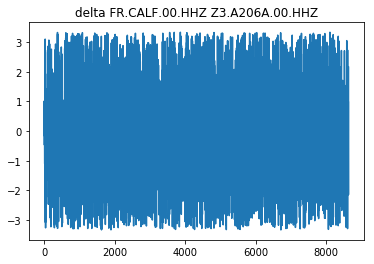

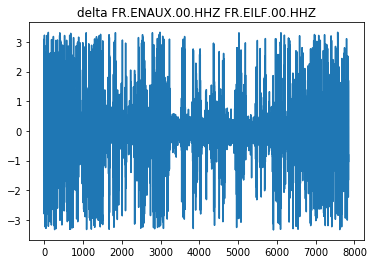

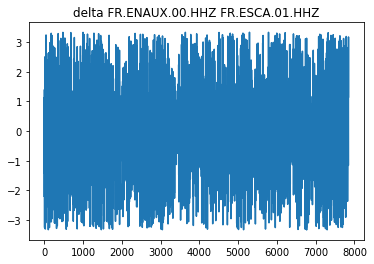

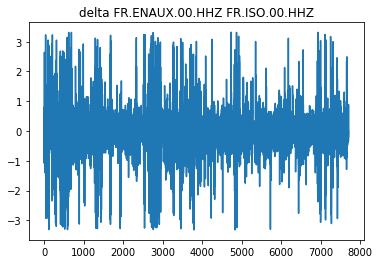

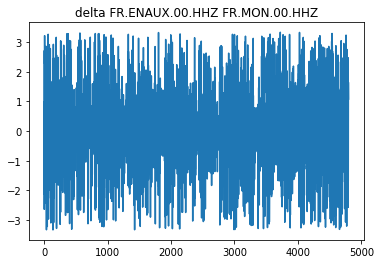

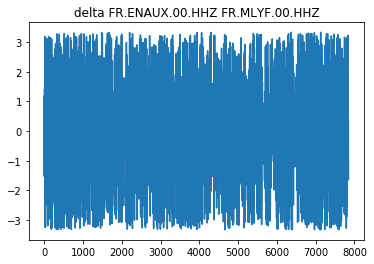

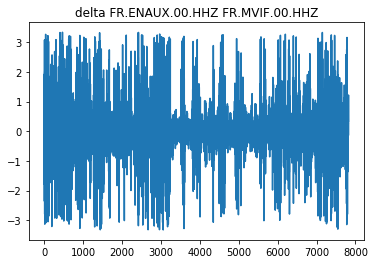

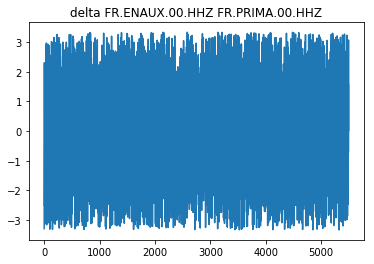

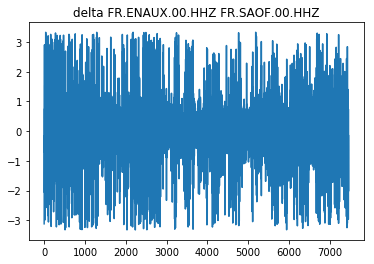

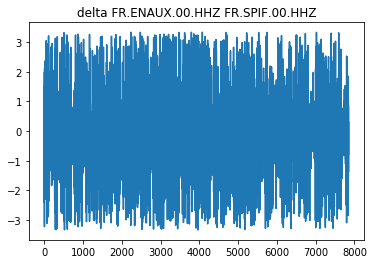

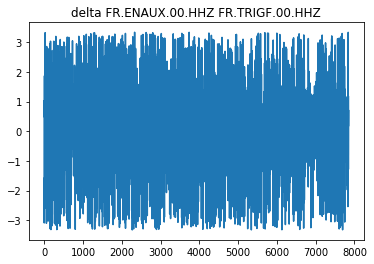

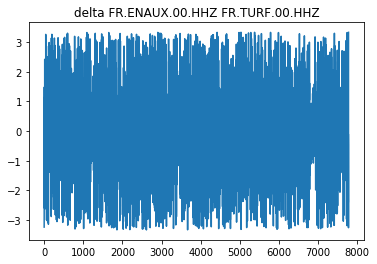

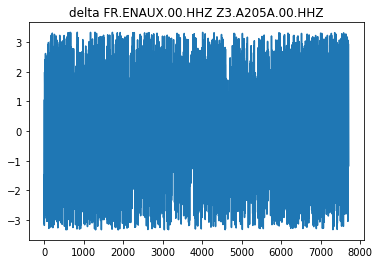

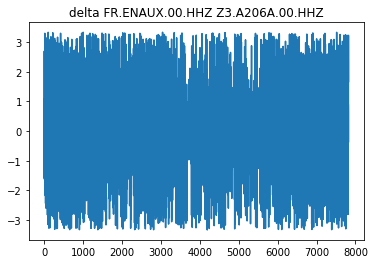

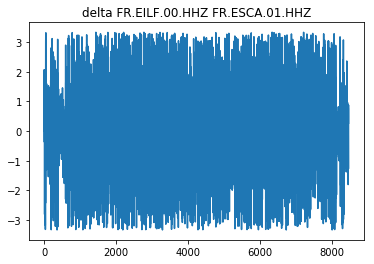

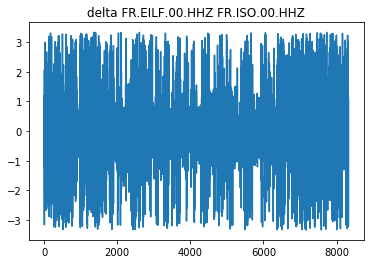

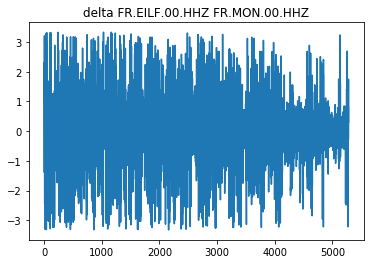

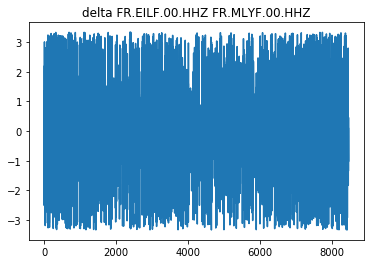

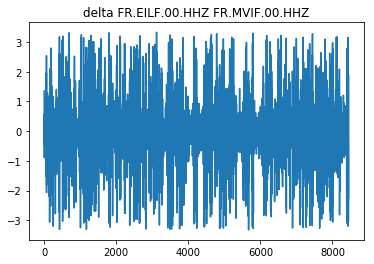

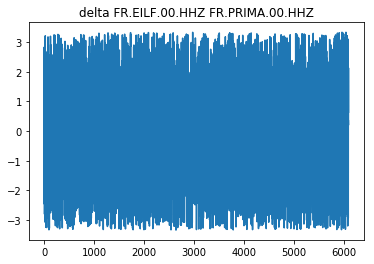

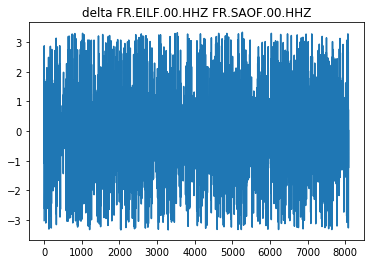

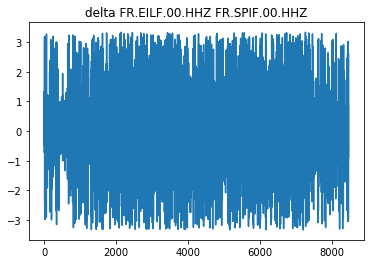

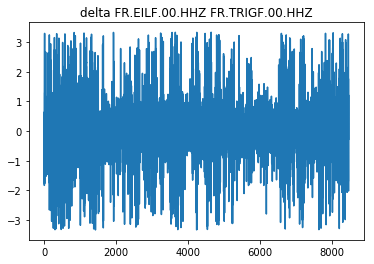

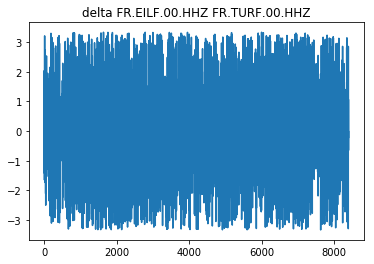

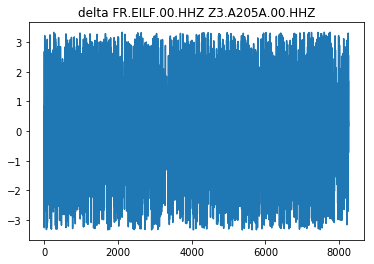

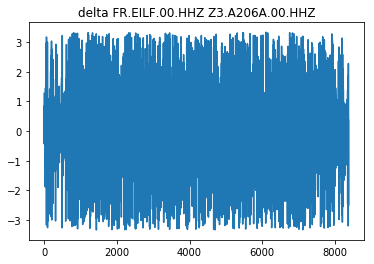

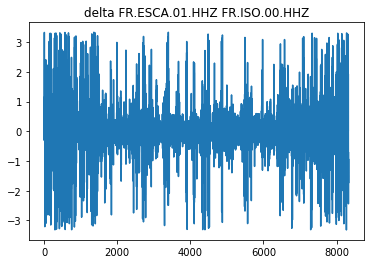

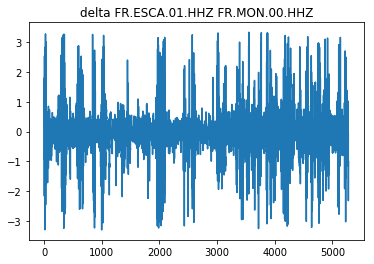

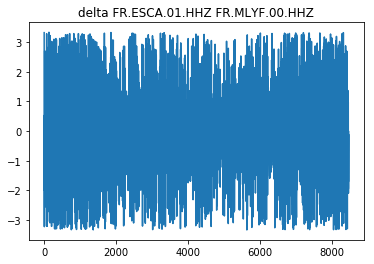

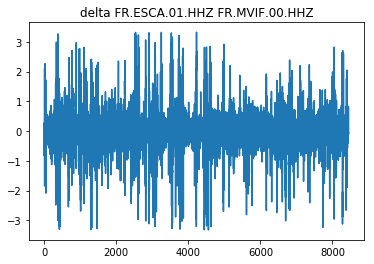

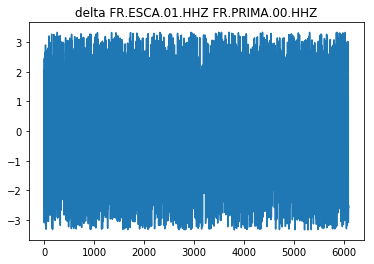

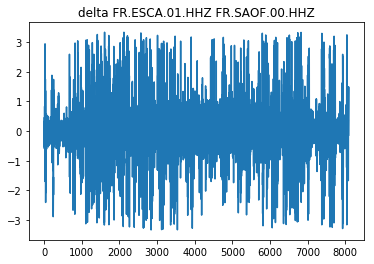

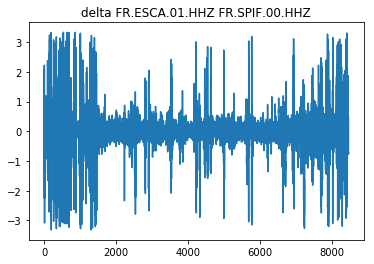

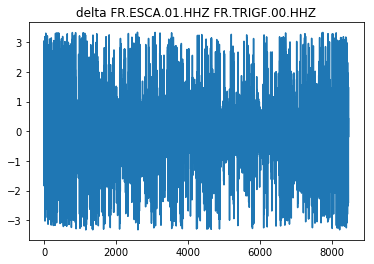

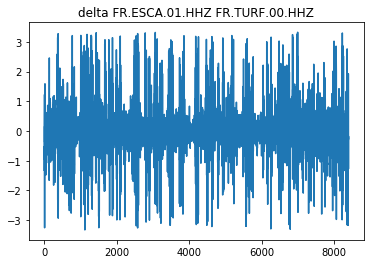

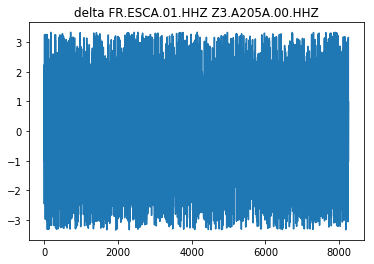

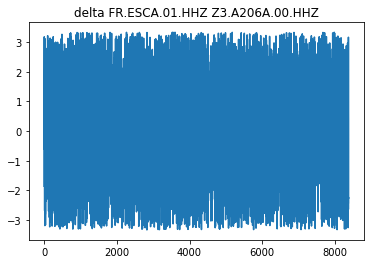

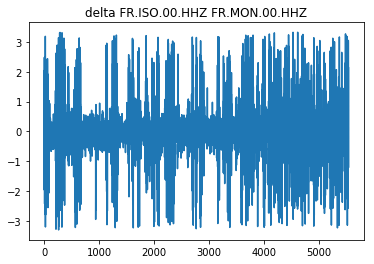

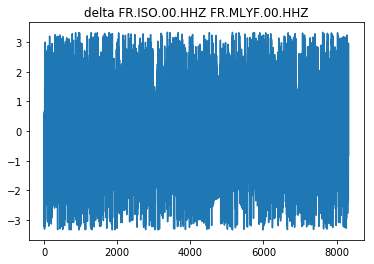

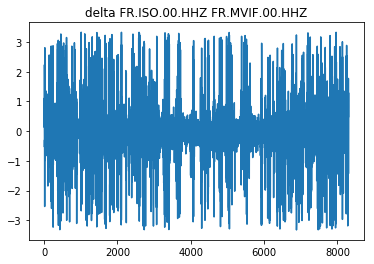

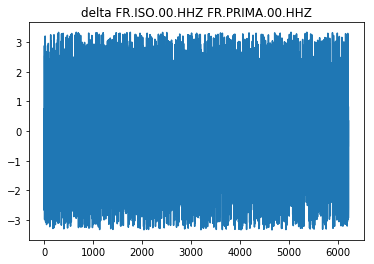

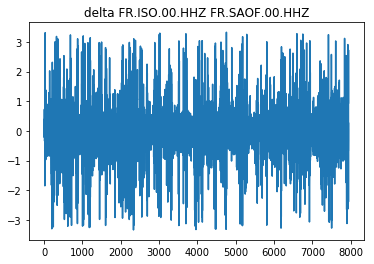

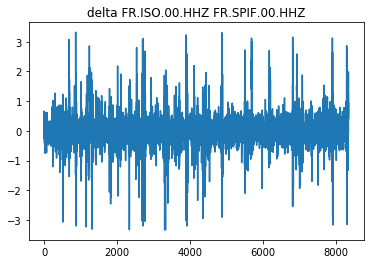

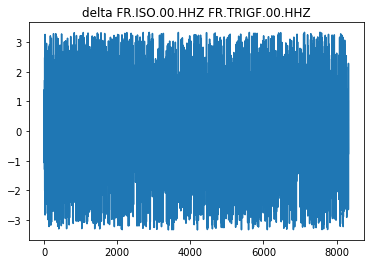

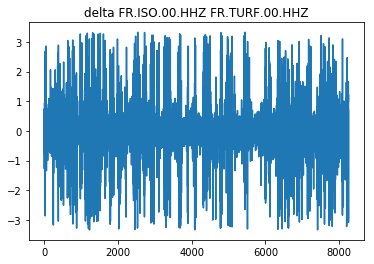

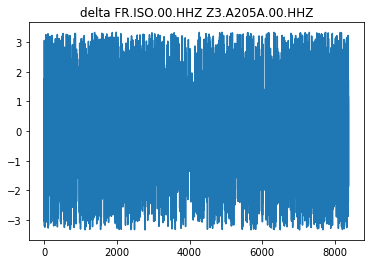

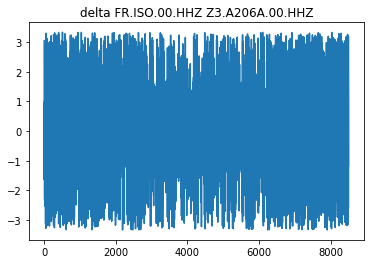

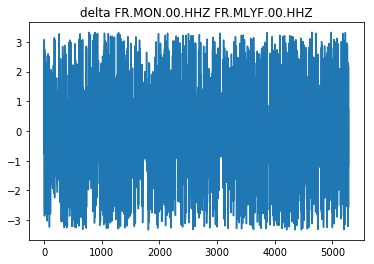

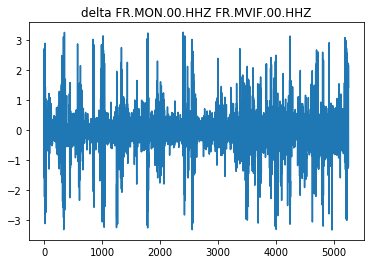

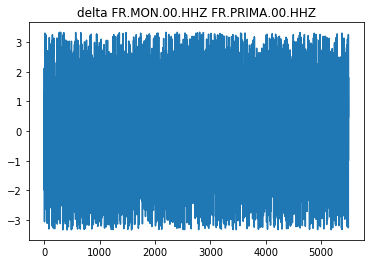

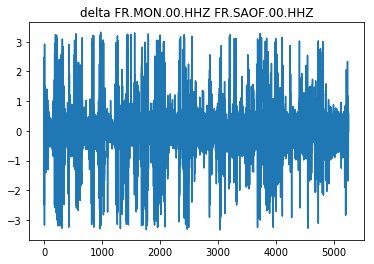

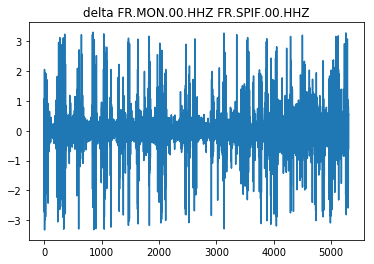

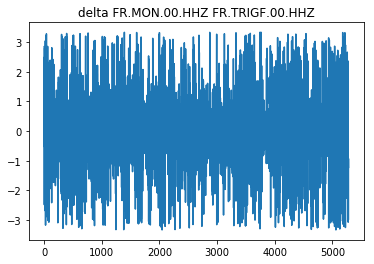

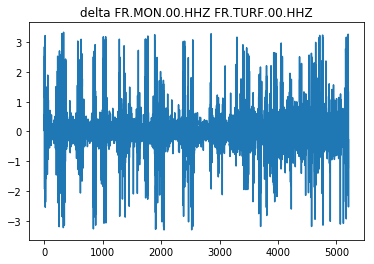

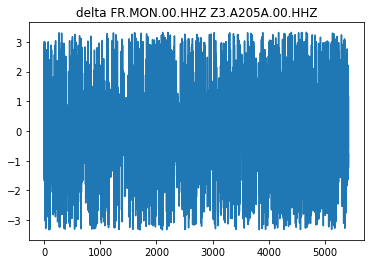

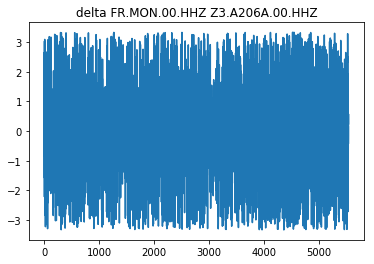

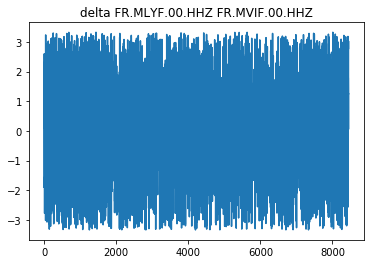

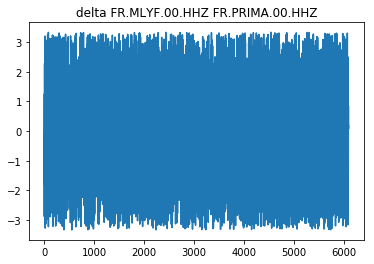

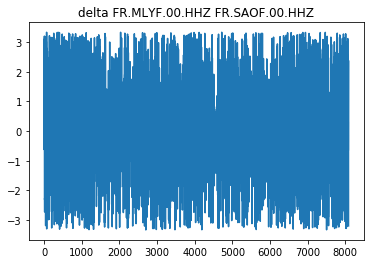

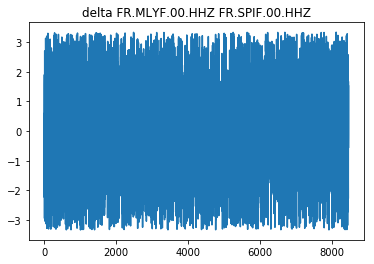

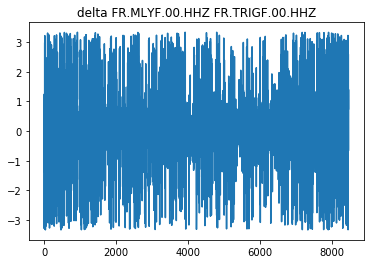

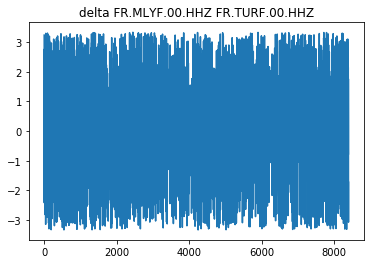

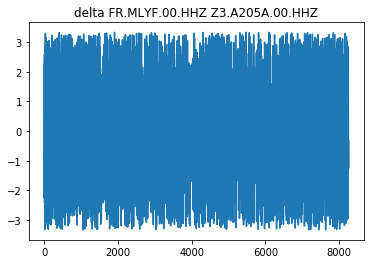

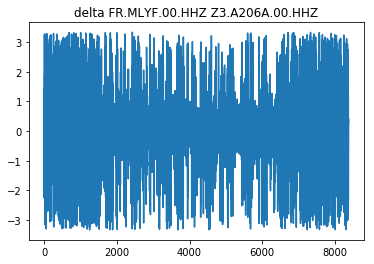

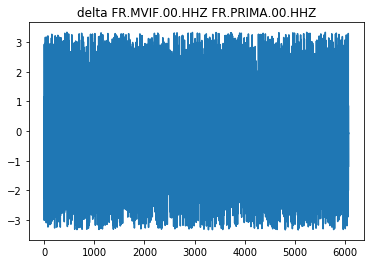

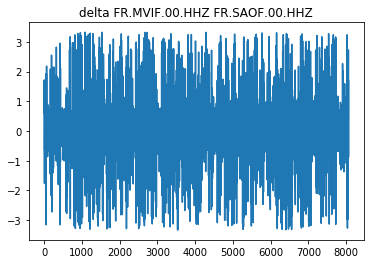

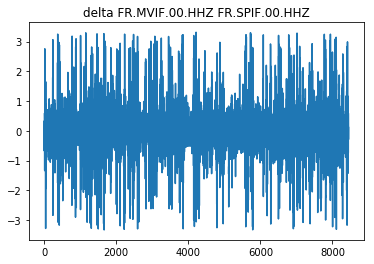

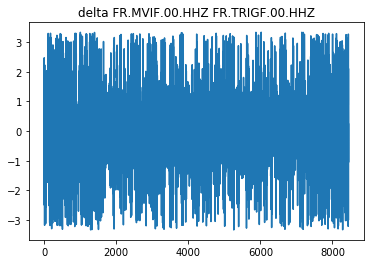

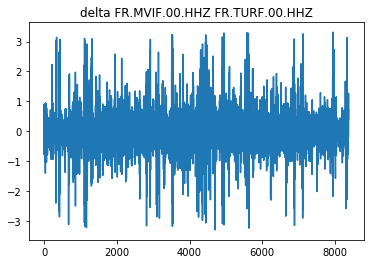

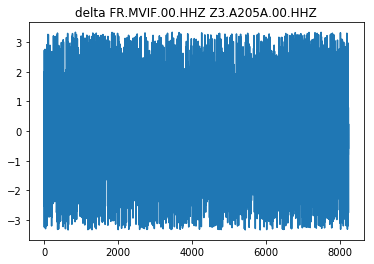

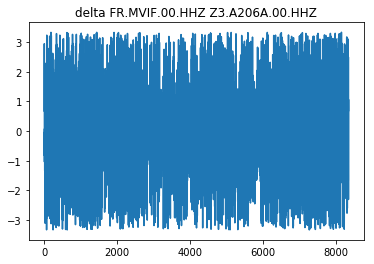

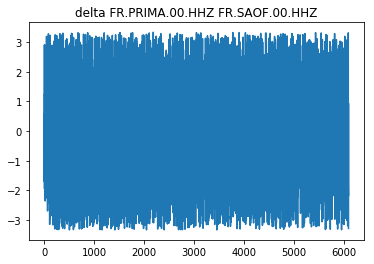

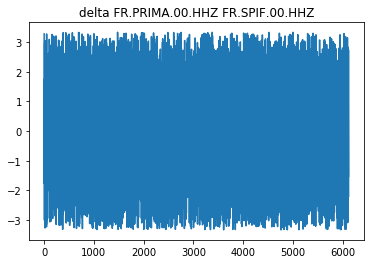

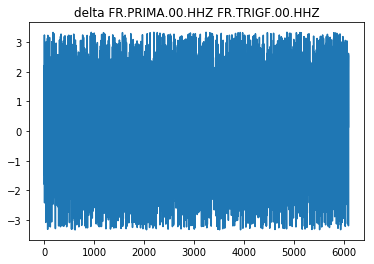

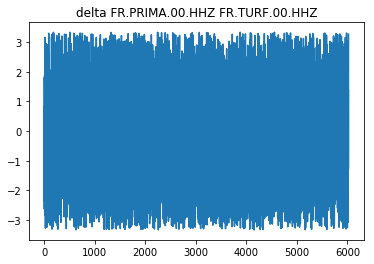

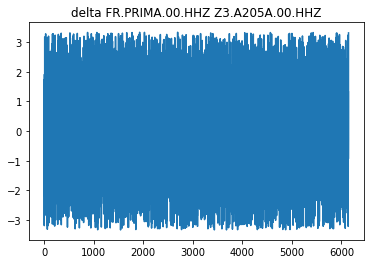

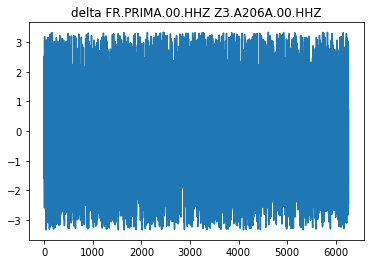

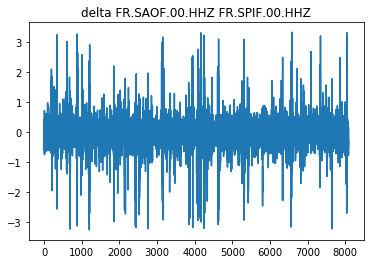

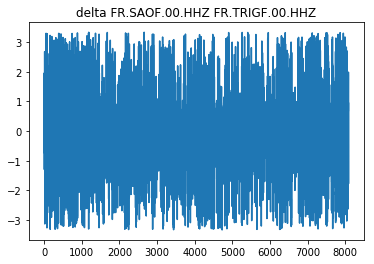

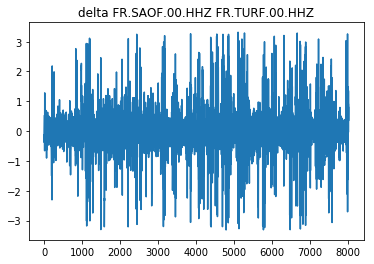

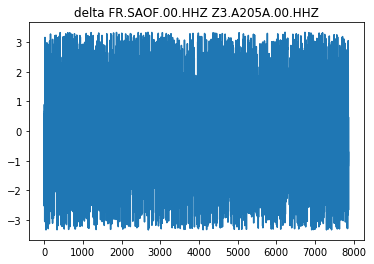

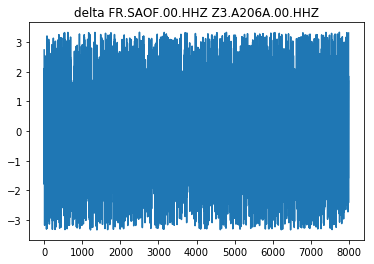

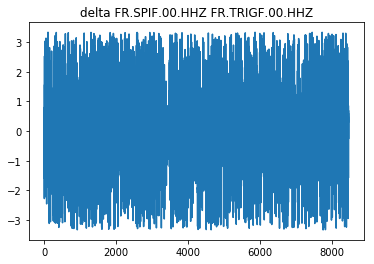

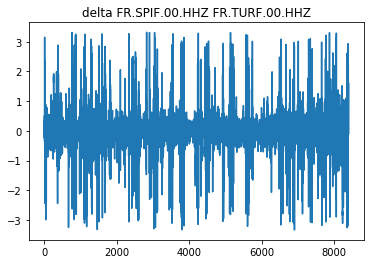

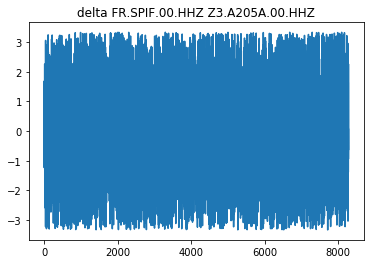

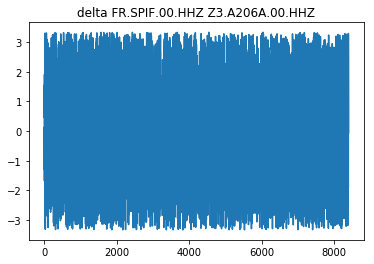

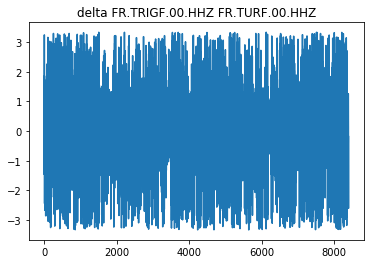

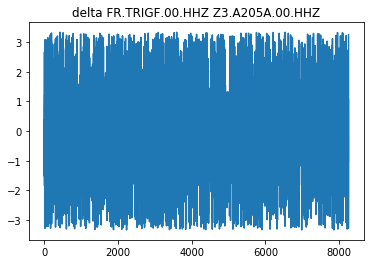

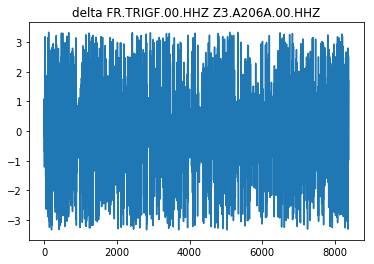

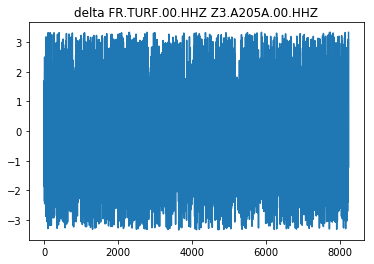

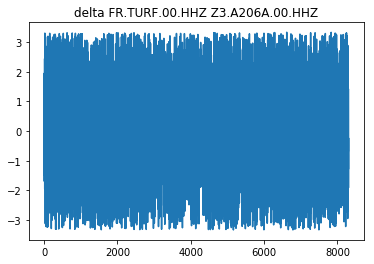

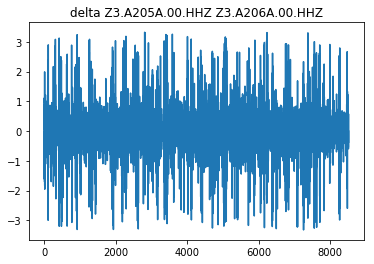

In [38]:
for keys, values in sorted_values.items():
    plt.plot(values)
    plt.title("delta %s" %(keys)) 
    plt.show()

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.EILF.00.HHZ


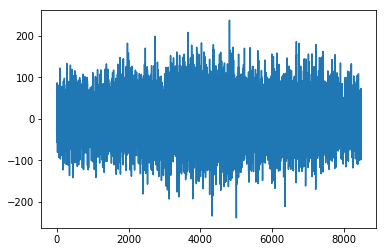

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ESCA.01.HHZ


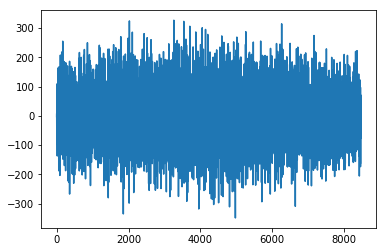

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ISO.00.HHZ


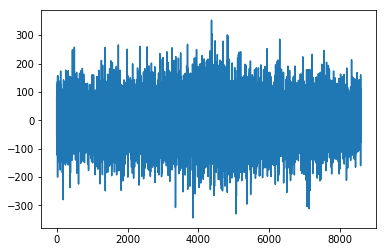

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MON.00.HHZ


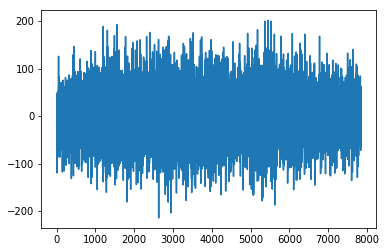

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MLYF.00.HHZ


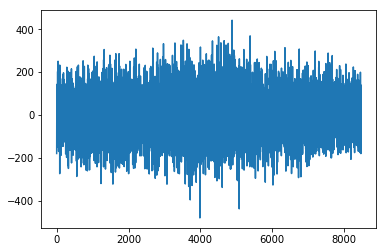

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MVIF.00.HHZ


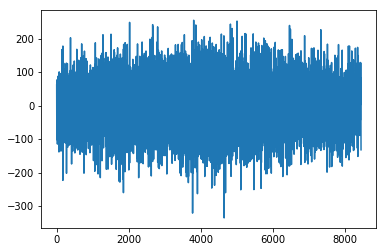

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.PRIMA.00.HHZ


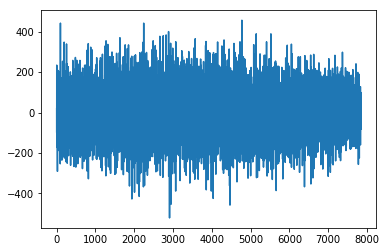

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SAOF.00.HHZ


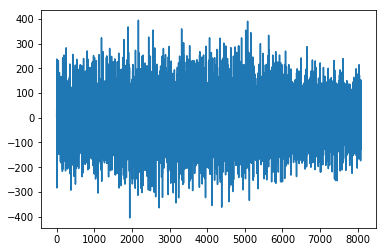

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SPIF.00.HHZ


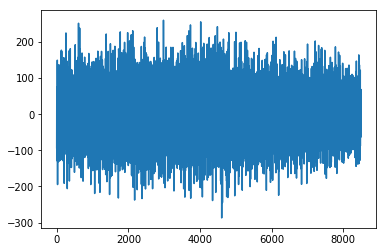

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TRIGF.00.HHZ


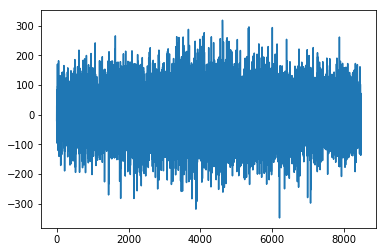

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TURF.00.HHZ


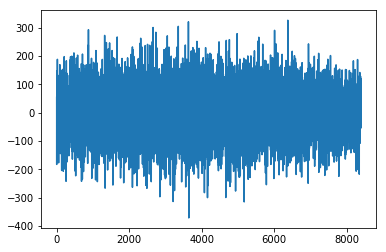

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A205A.00.HHZ


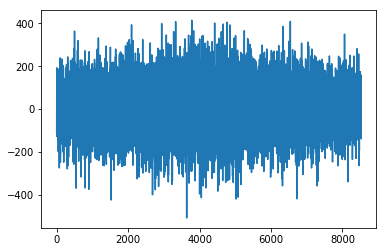

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A206A.00.HHZ


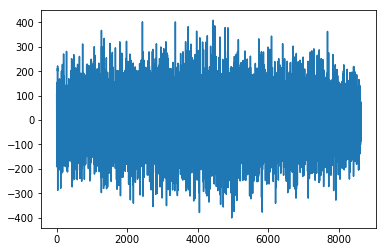

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ


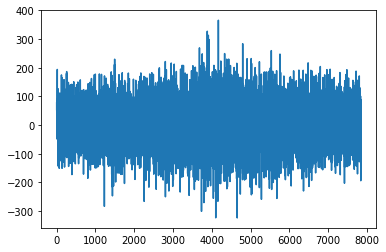

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ESCA.01.HHZ


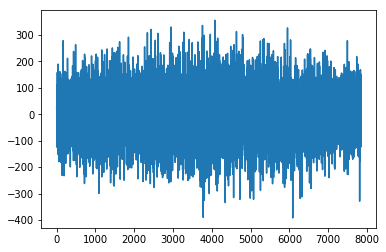

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ISO.00.HHZ


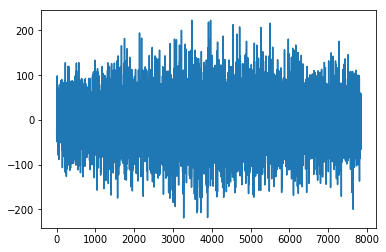

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MON.00.HHZ


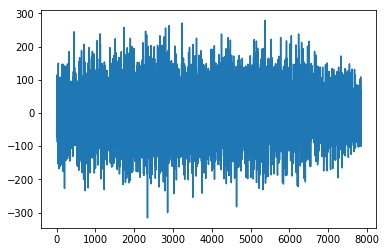

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MLYF.00.HHZ


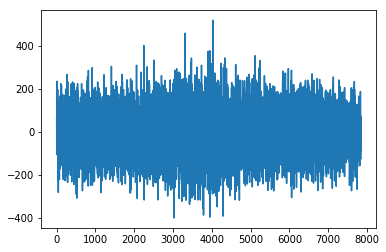

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MVIF.00.HHZ


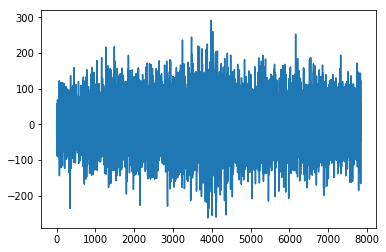

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.PRIMA.00.HHZ


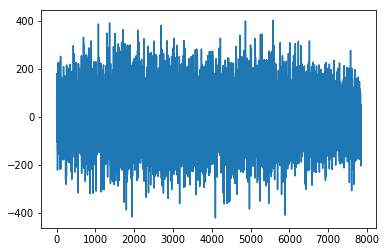

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.SAOF.00.HHZ


KeyboardInterrupt: 

In [43]:
for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1, value2, mode='same'))
            print(key1, key2)
            #plt.title("%s and %s") %(key1, key2)
            plt.show()

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.EILF.00.HHZ


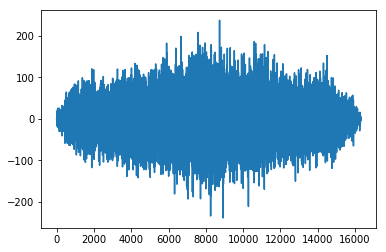

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ESCA.01.HHZ


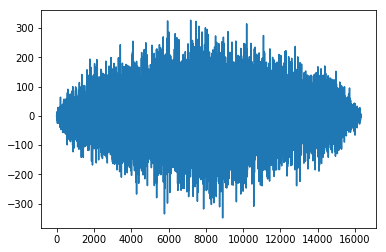

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ISO.00.HHZ


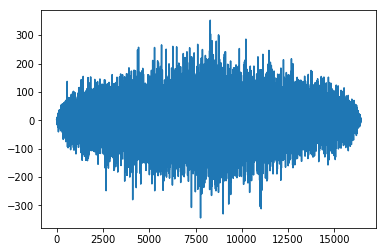

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MON.00.HHZ


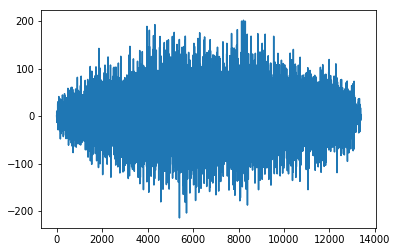

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MLYF.00.HHZ


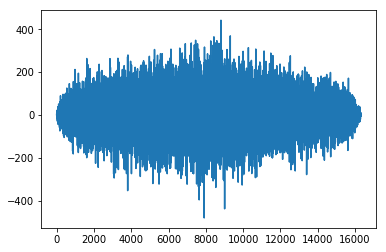

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MVIF.00.HHZ


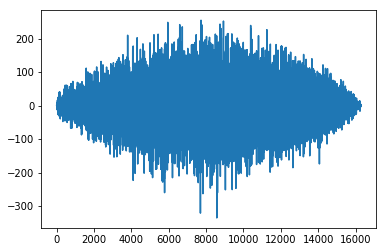

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.PRIMA.00.HHZ


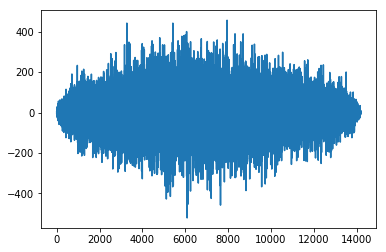

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SAOF.00.HHZ


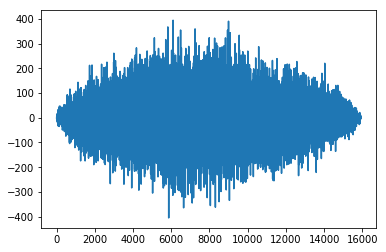

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SPIF.00.HHZ


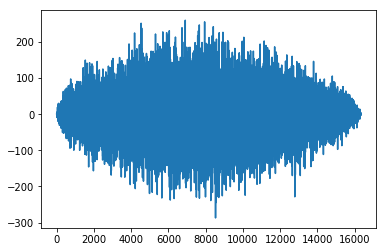

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TRIGF.00.HHZ


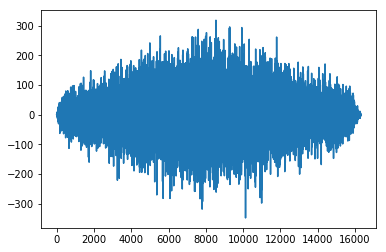

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TURF.00.HHZ


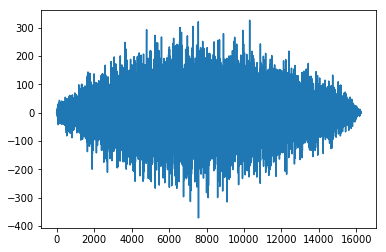

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A205A.00.HHZ


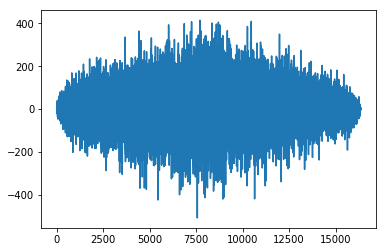

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A206A.00.HHZ


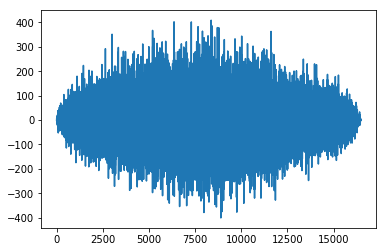

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ


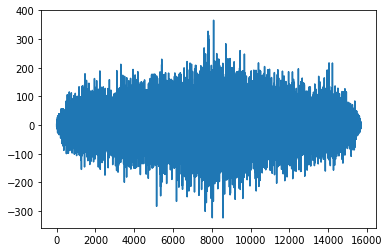

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ESCA.01.HHZ


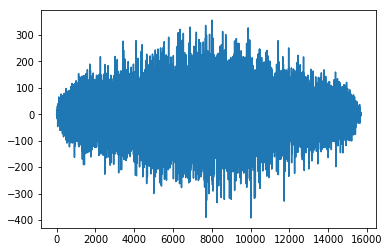

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ISO.00.HHZ


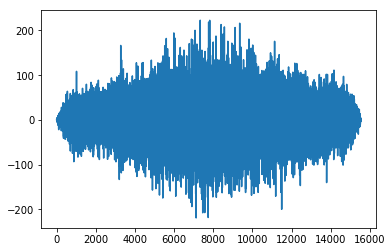

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MON.00.HHZ


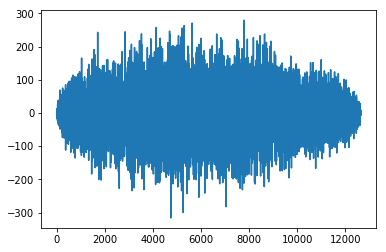

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MLYF.00.HHZ


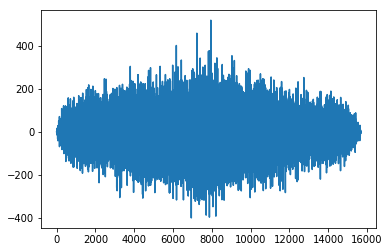

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MVIF.00.HHZ


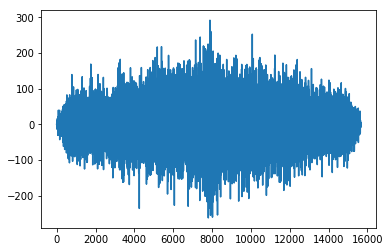

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.PRIMA.00.HHZ


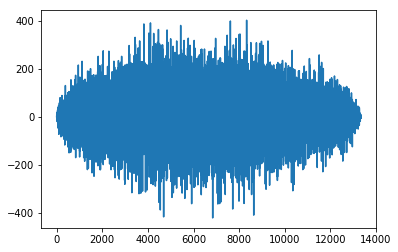

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.SAOF.00.HHZ


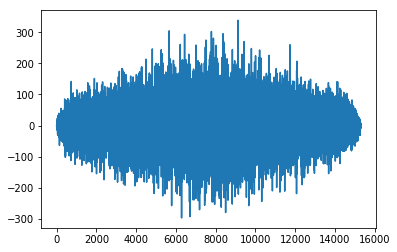

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.SPIF.00.HHZ


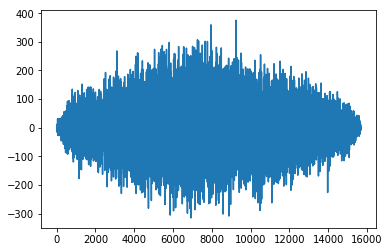

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.TRIGF.00.HHZ


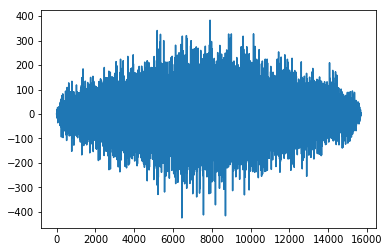

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.TURF.00.HHZ


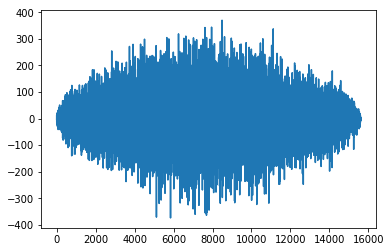

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ Z3.A205A.00.HHZ


KeyboardInterrupt: 

In [44]:
for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1, value2, mode='full'))
            print(key1, key2)
            #plt.title("%s and %s") %(key1, key2)
            plt.show()

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.EILF.00.HHZ


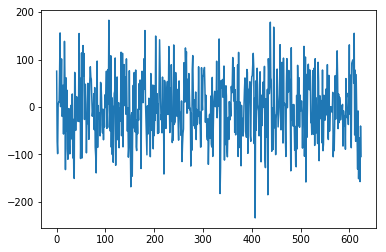

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ESCA.01.HHZ


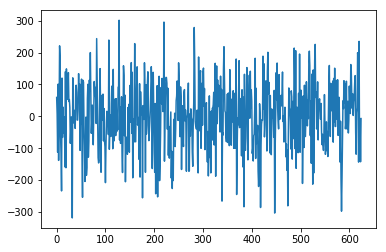

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.ISO.00.HHZ


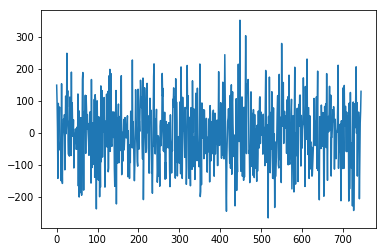

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MON.00.HHZ


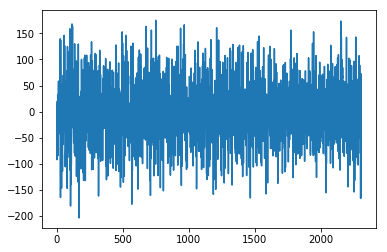

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MLYF.00.HHZ


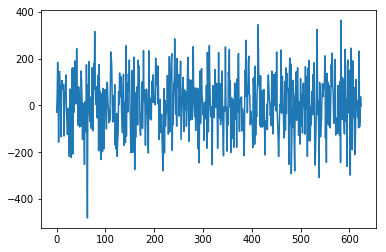

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.MVIF.00.HHZ


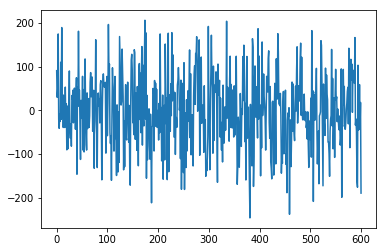

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.PRIMA.00.HHZ


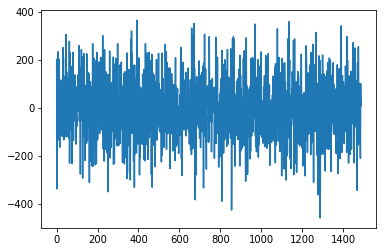

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SAOF.00.HHZ


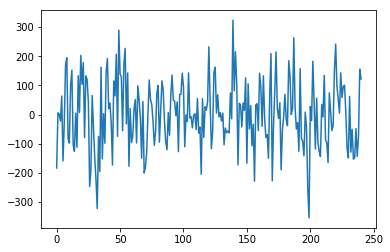

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.SPIF.00.HHZ


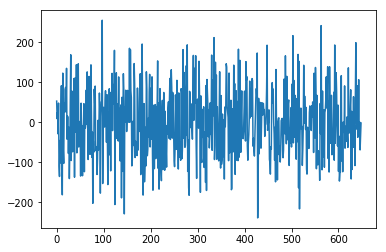

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TRIGF.00.HHZ


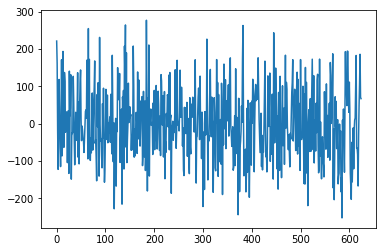

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ FR.TURF.00.HHZ


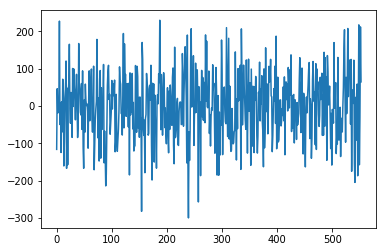

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A205A.00.HHZ


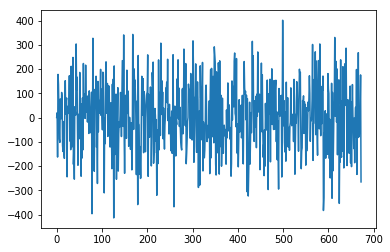

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.CALF.00.HHZ Z3.A206A.00.HHZ


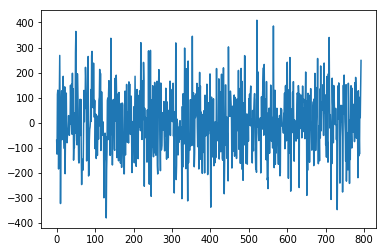

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ


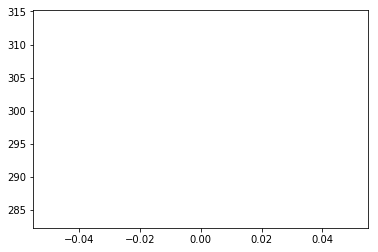

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ESCA.01.HHZ


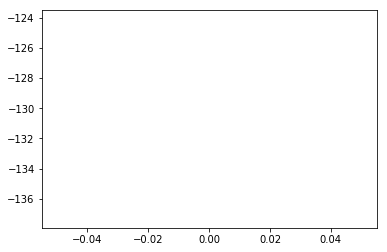

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.ISO.00.HHZ


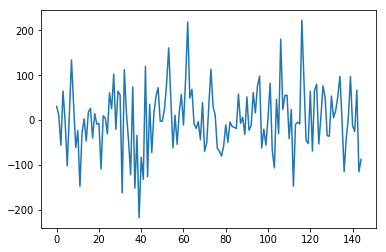

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MON.00.HHZ


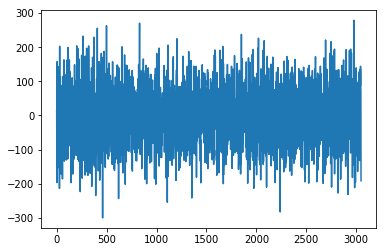

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MLYF.00.HHZ


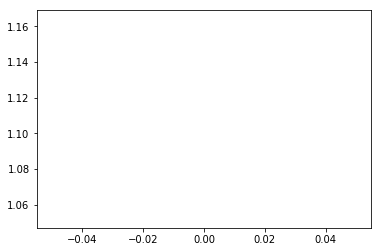

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.MVIF.00.HHZ


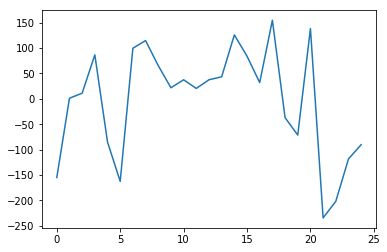

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.PRIMA.00.HHZ


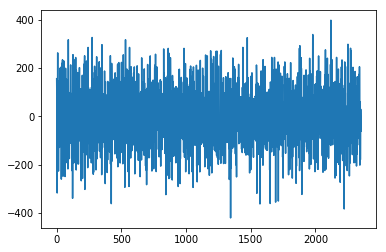

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.SAOF.00.HHZ


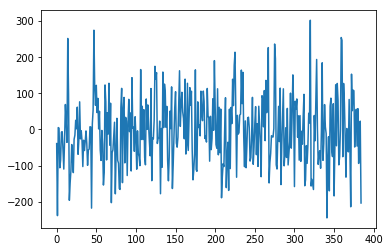

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.SPIF.00.HHZ


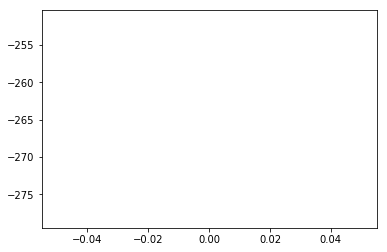

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.TRIGF.00.HHZ


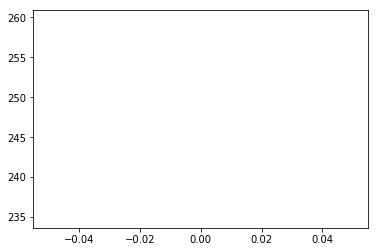

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ FR.TURF.00.HHZ


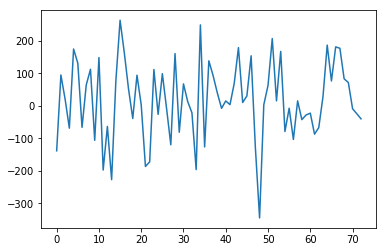

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ Z3.A205A.00.HHZ


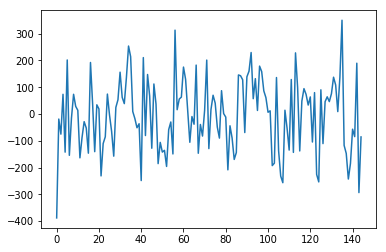

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ENAUX.00.HHZ Z3.A206A.00.HHZ


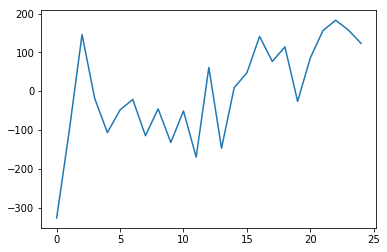

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.ESCA.01.HHZ


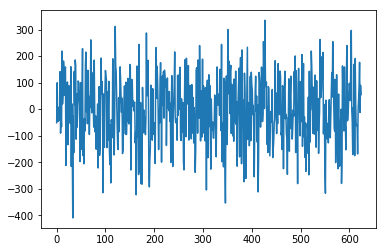

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.ISO.00.HHZ


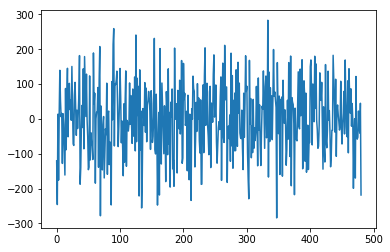

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.MON.00.HHZ


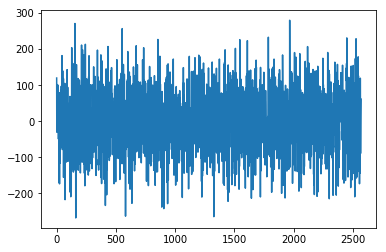

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.MLYF.00.HHZ


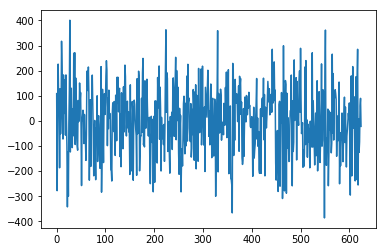

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.MVIF.00.HHZ


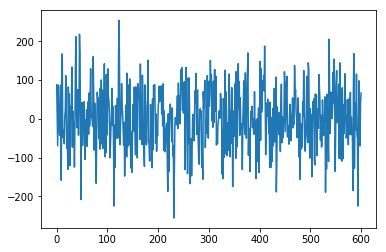

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.PRIMA.00.HHZ


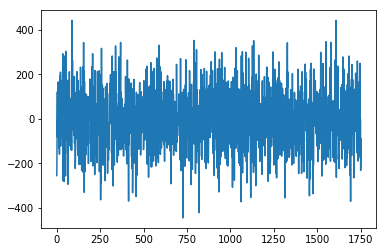

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.SAOF.00.HHZ


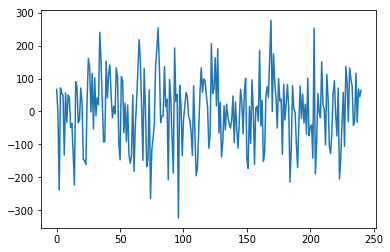

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.SPIF.00.HHZ


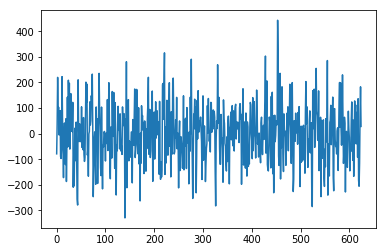

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.TRIGF.00.HHZ


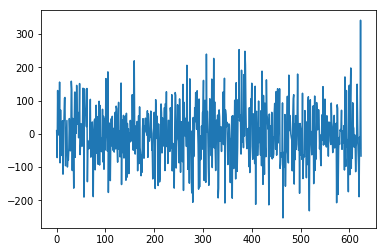

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ FR.TURF.00.HHZ


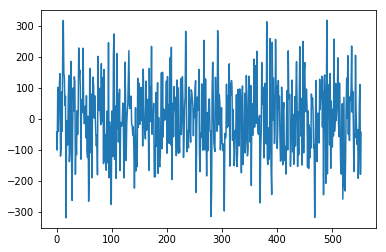

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ Z3.A205A.00.HHZ


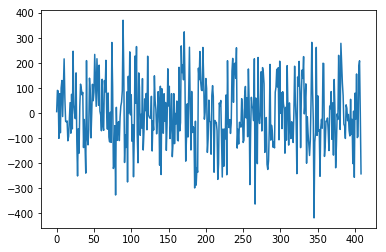

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.EILF.00.HHZ Z3.A206A.00.HHZ


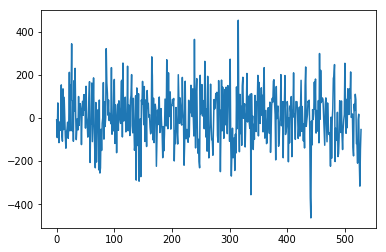

FR.CALF.00.HHZ FR.ENAUX.00.HHZ FR.ESCA.01.HHZ FR.ISO.00.HHZ


KeyboardInterrupt: 

In [45]:
for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1, value2, mode='valid'))
            print(key1, key2)
            #plt.title("%s and %s") %(key1, key2)
            plt.show()

In [ ]:
"""for key1, value1 in sorted_values.items():
    for key2, value2 in sorted_values.items():
        if value1 != value2:
            plt.plot(np.correlate(value1-avg_delay_per_day, value2-avg_delay_per_day, mode='full'))
            print(key1, key2)
            plt.show()
"""

D:\Anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


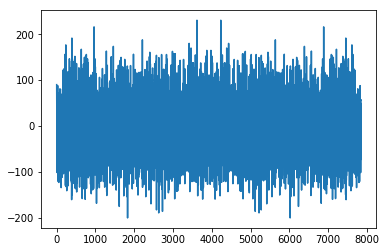

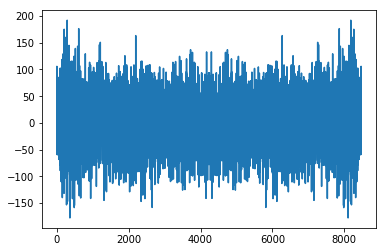

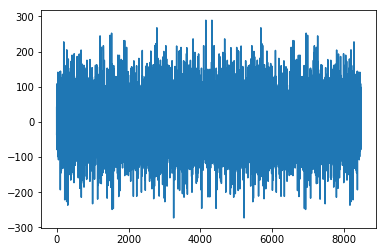

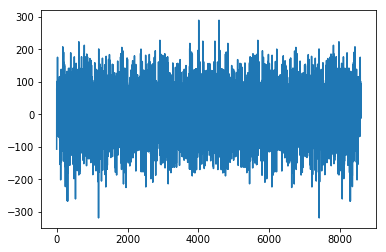

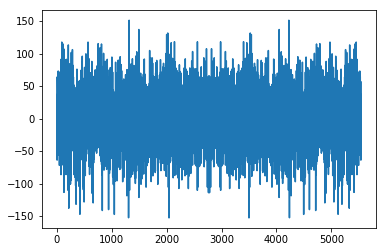

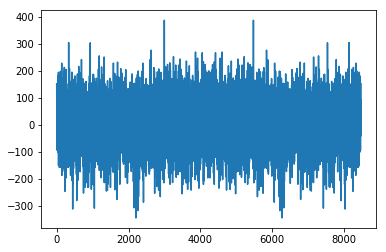

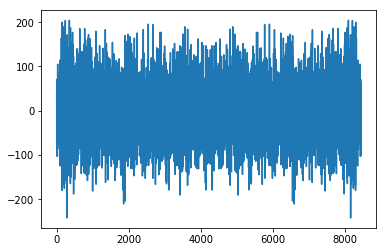

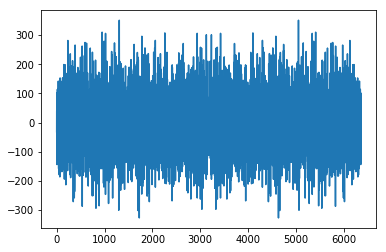

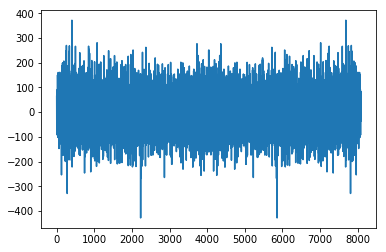

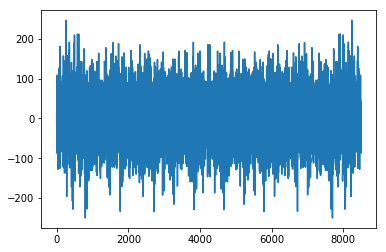

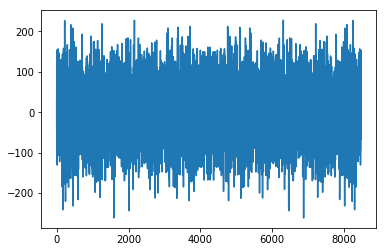

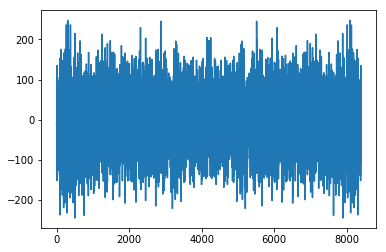

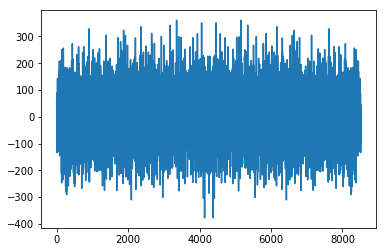

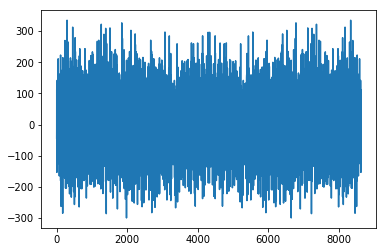

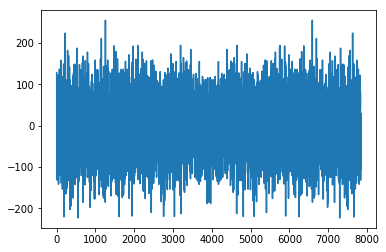

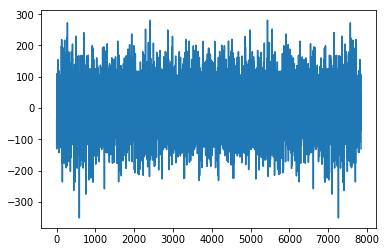

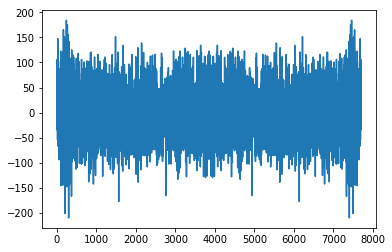

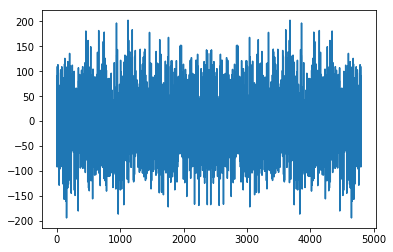

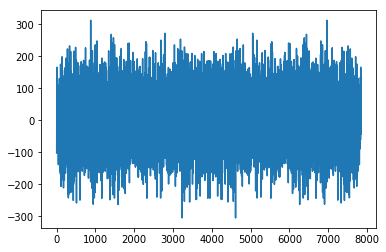

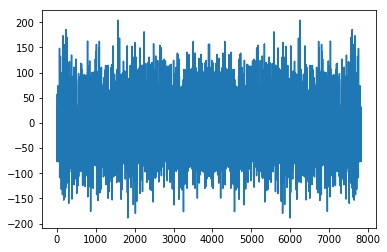

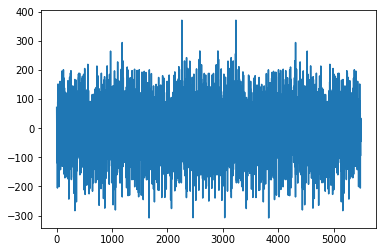

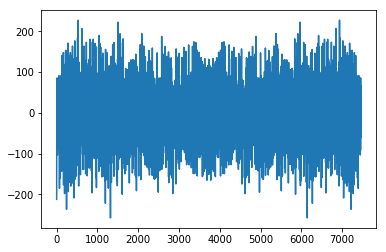

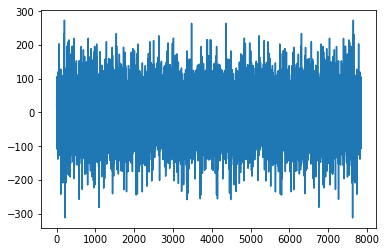

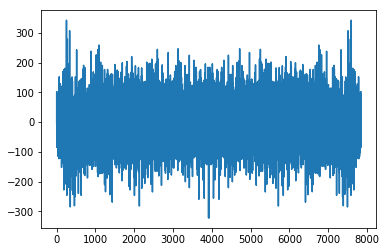

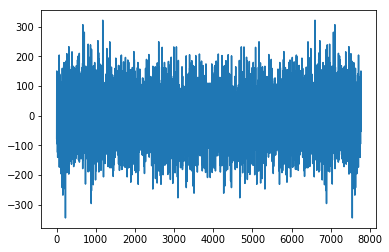

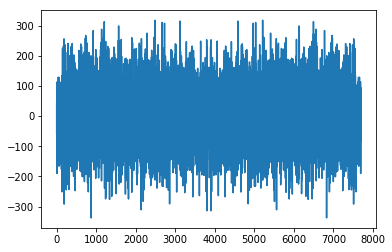

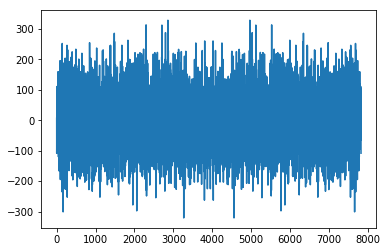

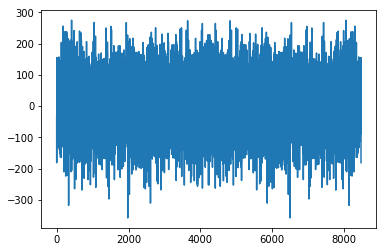

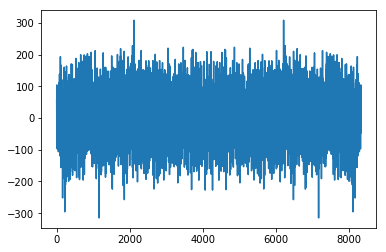

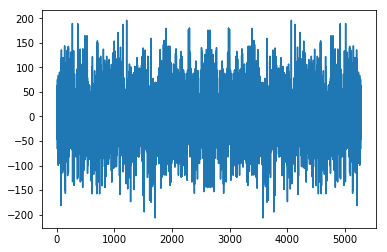

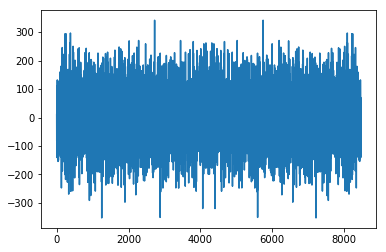

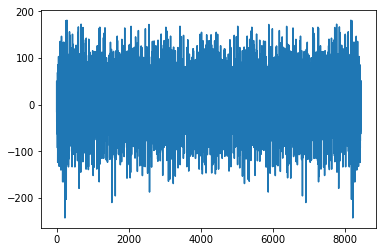

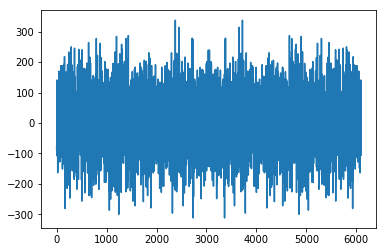

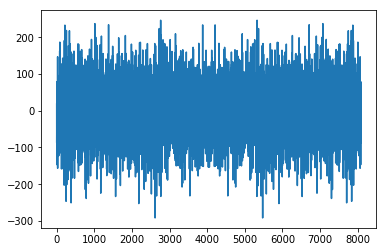

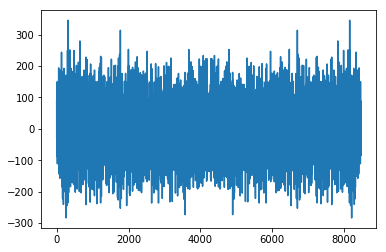

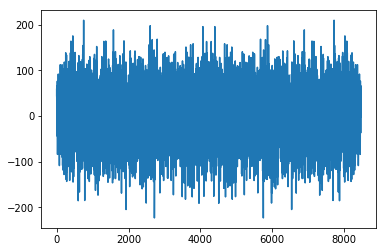

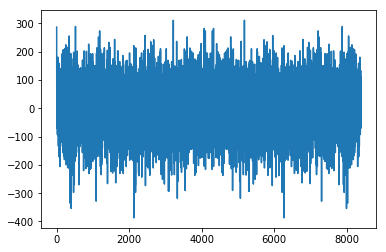

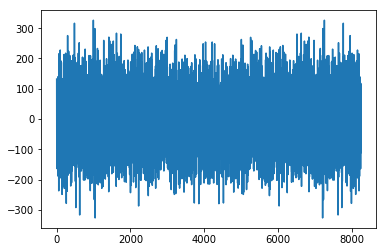

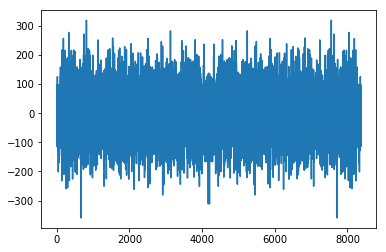

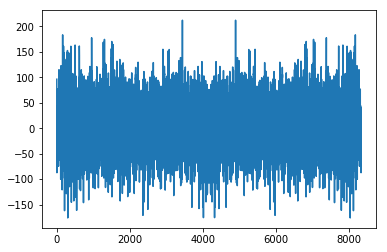

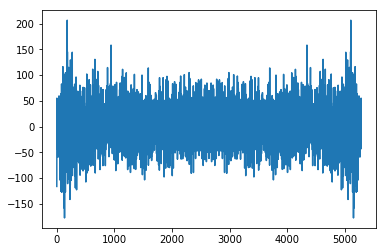

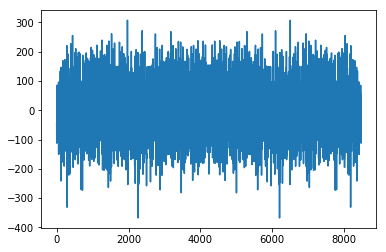

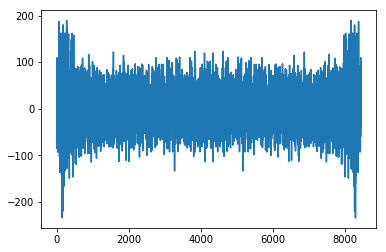

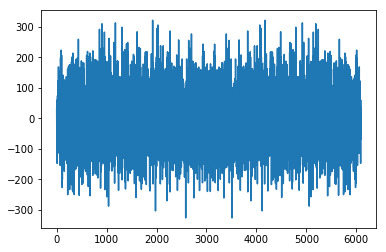

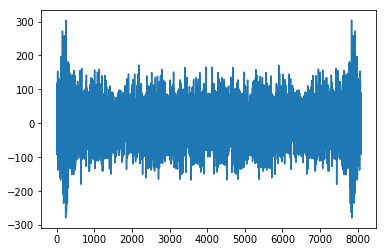

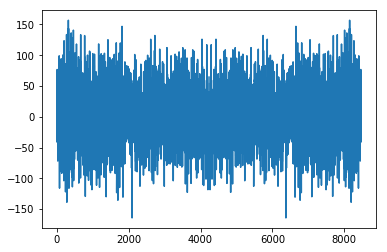

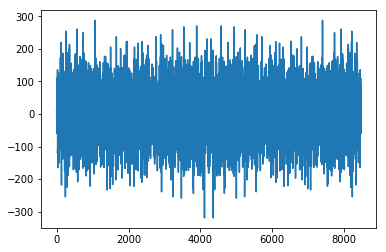

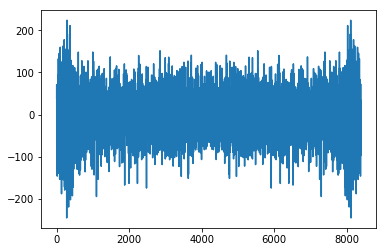

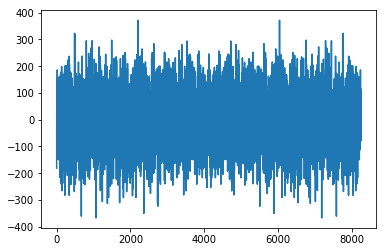

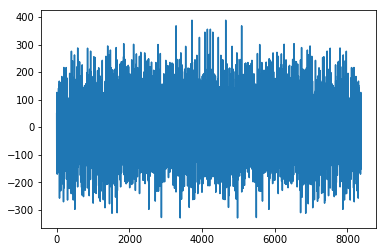

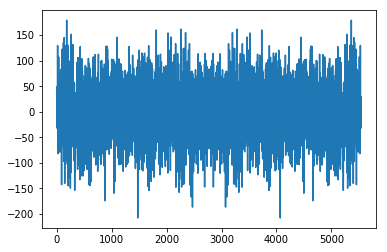

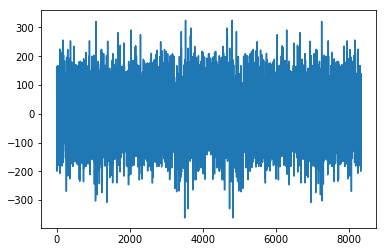

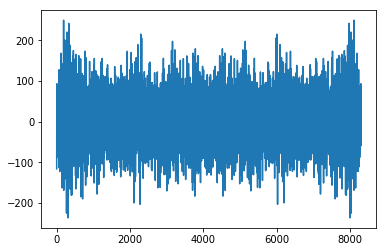

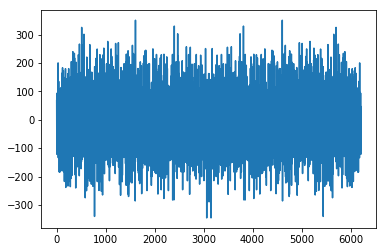

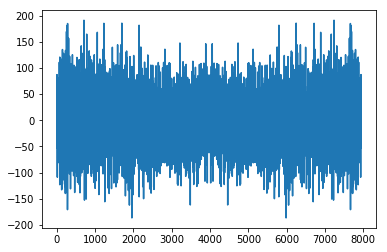

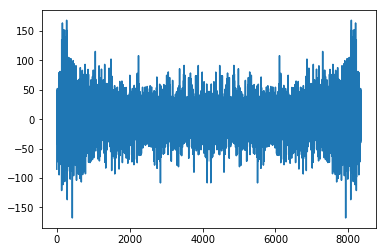

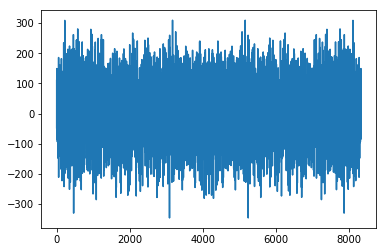

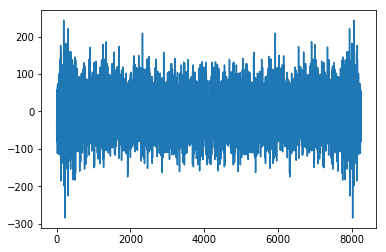

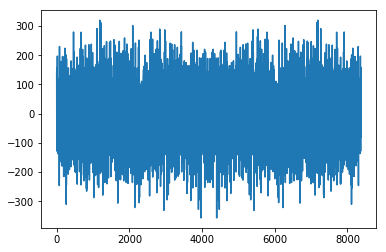

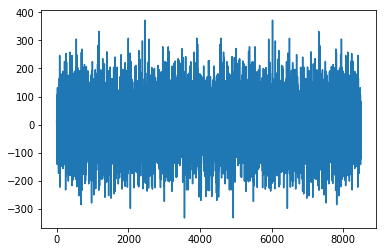

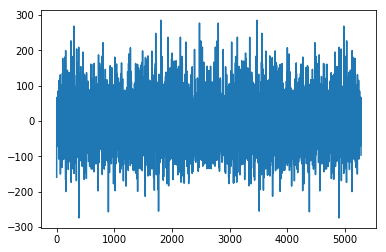

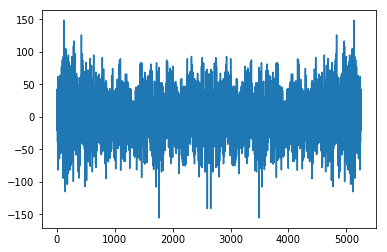

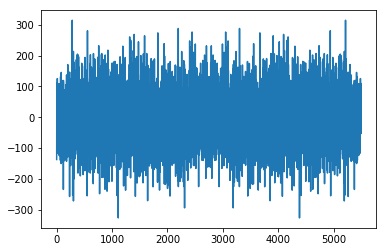

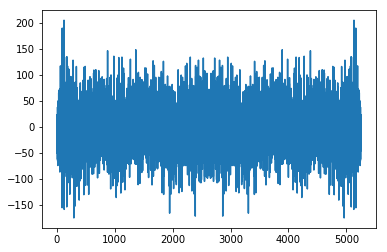

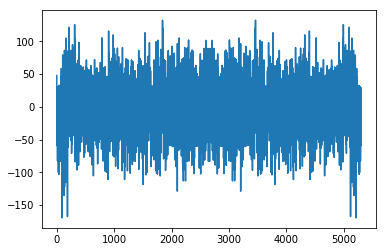

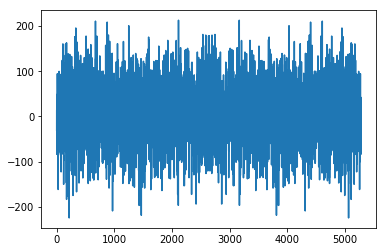

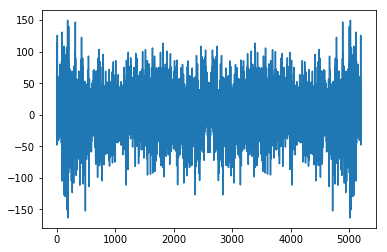

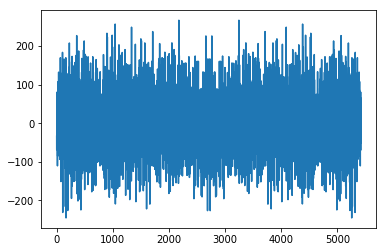

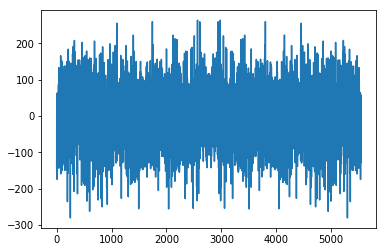

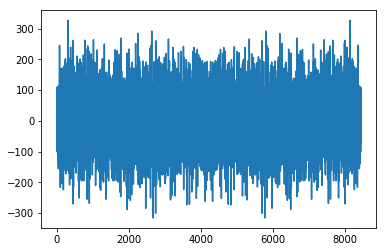

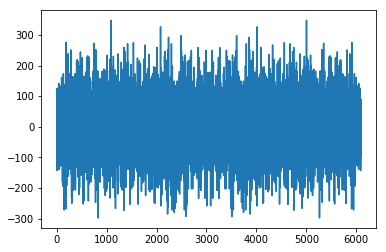

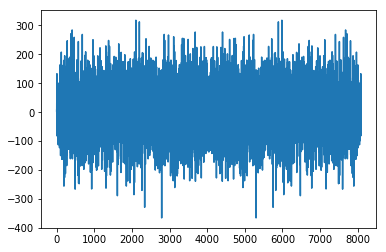

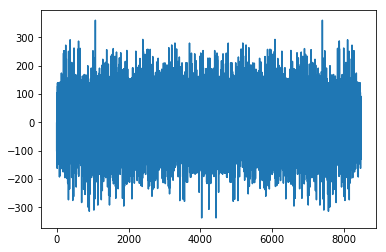

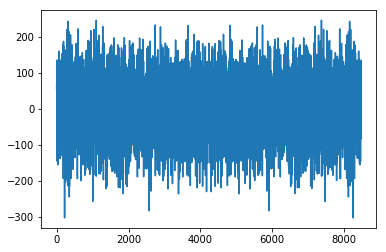

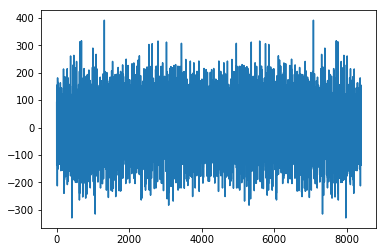

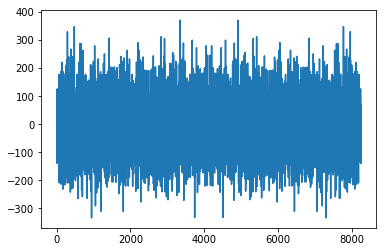

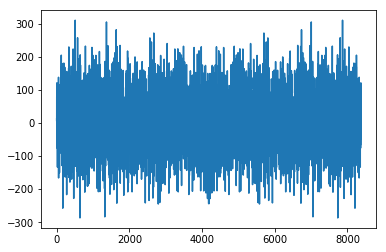

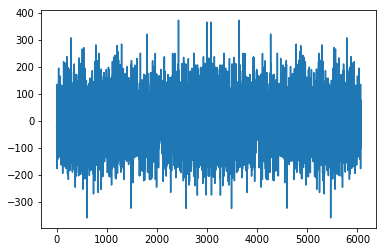

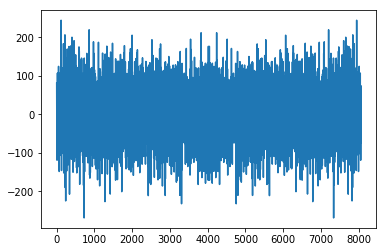

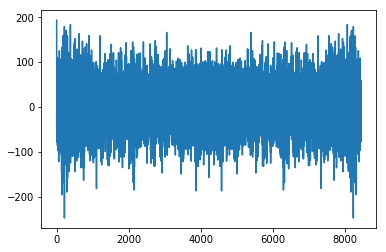

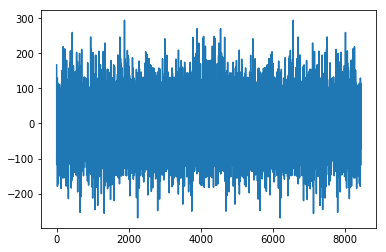

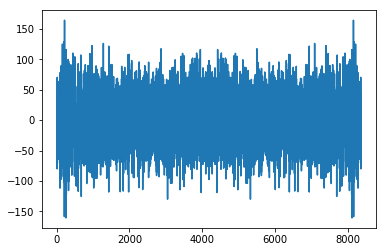

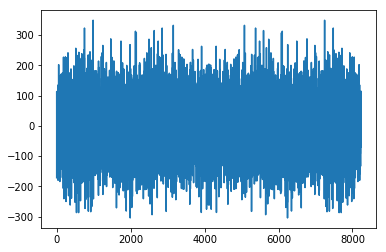

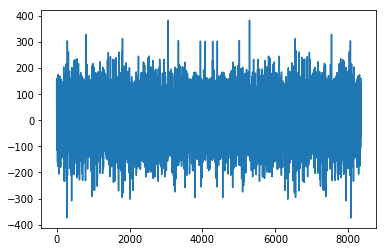

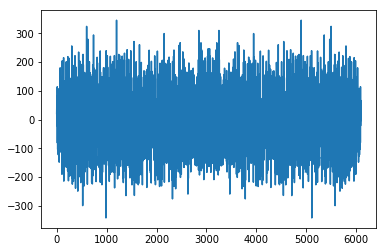

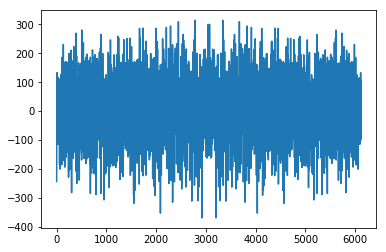

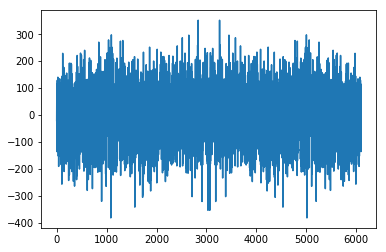

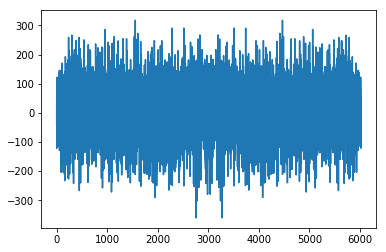

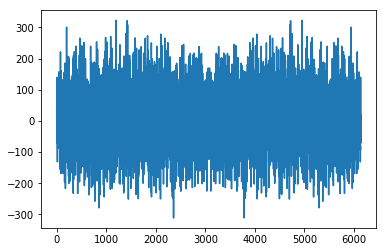

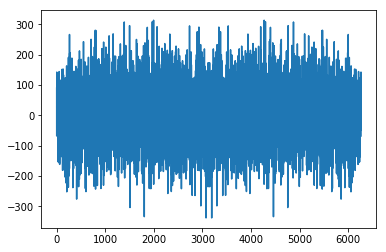

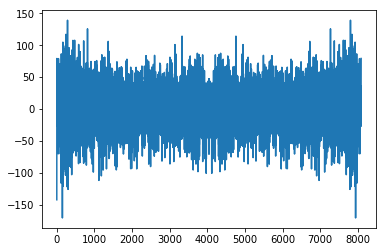

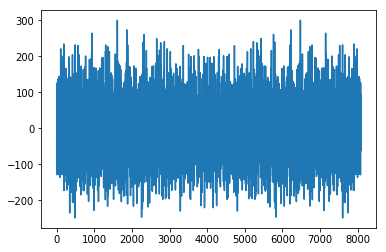

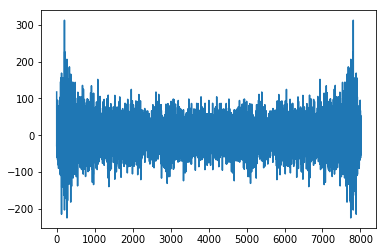

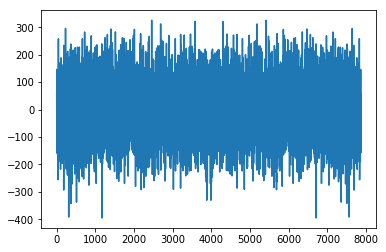

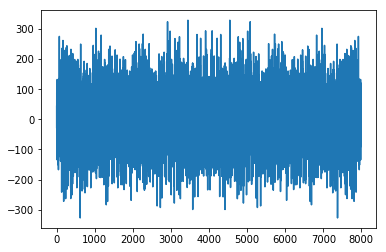

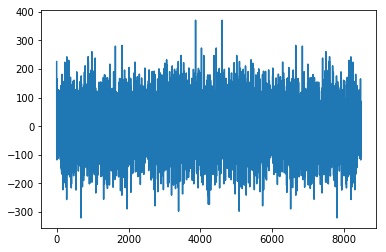

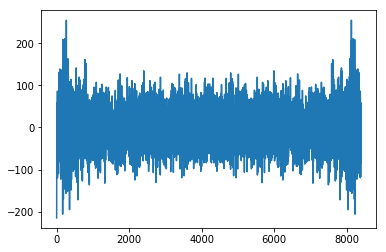

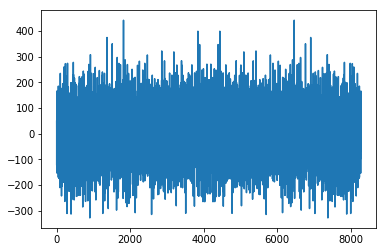

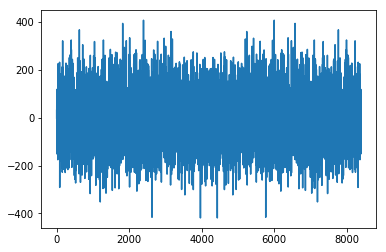

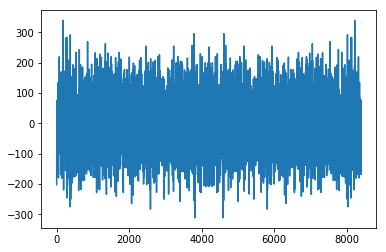

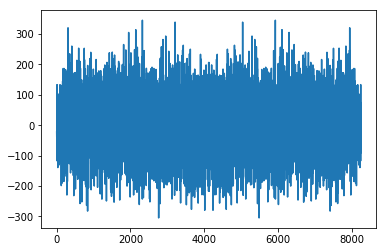

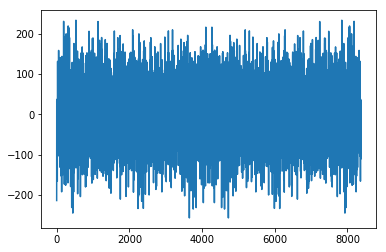

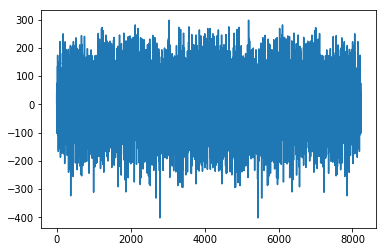

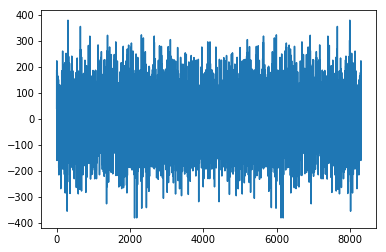

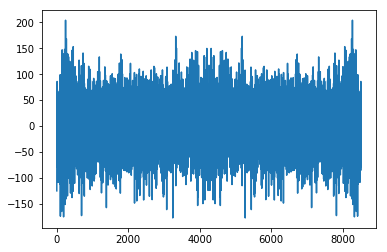

In [40]:
for value1 in sorted_values.values():
    plt.plot(np.fft.fft(value1)[:])
    plt.show()    